<a href="https://colab.research.google.com/github/vatsalbagri1102/COGS108_Repo/blob/main/FinalProject_group002.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# UCSD Course Enrollment Speed ​​Analysis And Prediction

# Names

- Rui Li
- Vatsal Bagri
- Sophia Ramirez
- Joyce Zhou
- Bernie Wu


# Abstract

Enrollment is a process which every student has to go through and it entails making decisions regarding the classes that we would like to pick. These decisions are often dictated by several factors such as requirement, professor rating etc. which assist our decisions of what we would first and second pass. Since every student goes through a similar process, we, as a group, wanted to analyze any trends that we could find in these metrics and the enrollment speed and perhaps predict the speed of these classes in the future.

To analyze the relationship in the dataset, we first extracted course data from multiple CSV files for different terms, namely Spring 2023, Winter 2023, and Fall 2022. This extraction was performed using a custom function that filtered data based on specific course prefixes (e.g., CSE, COGS, MATH, ECE) and concatenated the relevant records. After assembling the datasets for each term and course, we separated the data into individual datasets for each department. The analysis then involved statistical methods such as linear regression, ANOVA, and various metrics to evaluate model performance. Visualization tools like seaborn and matplotlib were used to illustrate the findings, providing insights into trends and relationships within the data. Finally, the datasets were saved and made available for future analysis.

While we had many findings they all contributed to a much larger picture and overall more cumulative findings. Conclusively our finding show that our hypothesis was partially true since the course enrollment speed in the departments we analyzed correlate positively with the courses' previous expected GPA and received GPA, but it show no significant relationship with the courses' and professors CAPES recommendation rate or the average study time per course. Using the states model’s OLS report, it reported that the P-values of both the expected GPA and received GPA and their correlation to enrollment speed had a small P-value which leads us to the conclusion that there of a correlation between the factors mentioned previously. Additionally we attempted to created predictions for enrollment speed using polynomial regressions but the R-squared scores were drastically under acceptable levels which meant that the predictions had very low precisions and thus unusable. Ultimately our findings allowed us to find support for our hypothesis, but our attempts to create a prediction were unsuccessful unfortunately.

We hypothesized a positive relationship between enrollment speed and prior year GPAs, course/professor recommendations, and major requirements, but a negative relationship with study hours. Our findings indicate that course enrollment speed in UCSD's CSE, COGS, ECE, and MATH departments positively correlates with Expected GPA and Received GPA, but not with CAPES recommendation rates or average study time per course. These results may be due to administrative adjustments in course sizes and potential flaws in method of quantifying enrollment speed. Observing enrollment rates over different pass times may provide more accurate predictions. By analyzing the relationship between enrollment speed and various academic attributes, we aim to provide a clearer picture of how courses fill up and the factors that influence this process.



# Research Question

What is the relationship between the UCSD's CSE/COGS/MATH/ECE department's course enrollment speed, and the course information (course GPAs, course/professor recommendation, study hours, major requirements)? How well can we predict the course enrollment speed based on the given information?

## Background and Prior Work

Our topic is to analyze the enrollment speed of UCSD's CSE/COGS/MATH/ECE courses (i.e., the rate at which courses fill up), find its correlation with the course information such as historical GPA and professor ratings, and then build a model that can accurately predict enrollment speed. As students at UCSD, many of us have experienced some level of anxiety during the registration process in each quarter. As this article mentions, "for many students, it has become a common occurrence to worry about what classes they may or may not get into" <a name="cite_ref-1"></a>[<sup>1</sup>](#cite_note-1) . It's evident that enrollment speed is a significant consideration for students when prioritizing course registration (clearly, students are more inclined to choose courses that fill up faster), and this is the inspiration for our group's topic.

On the other hand, enrollment speed also reflects the needs of courses size extension. At UCSD, course scheduling has been a serious issue, with many professors and students complaining about the lack of seats in university courses <a name="cite_ref-1"></a>[<sup>1</sup>](#cite_note-1) . Therefore, we hope that our topic is not only useful for the students, but also can help university management in making more rational course arrangements.

Some organizations have already conducted research and predictions on enrollment speed for purposes similar to ours <a name="cite_ref-2"></a>[<sup>2</sup>](#cite_note-2). They built models based on historical enrollment data from UCSD to predict the speed of different courses fill up. They also pointed out that 44% of university classes are completely filled, with almost half of these classes filling up on the first pass. <a name="cite_ref-2"></a>[<sup>2</sup>](#cite_note-2) However, their work was based on data from the winter quarter of 2020 and did not include courses in the CSE major. We aim to obtain updated conclusions and models by collecting and analyzing more data on CSE courses.


1. <a name="cite_note-1"></a> [^](#cite_ref-1) Huie, M. (20 Nov 2023). The scramble for scheduling. UCSD The GUARDIAN. https://ucsdguardian.org/2023/11/20/the-scramble-for-scheduling/
2. <a name="cite_note-2"></a> [^](#cite_ref-2) Kan, A., Atienza, K., & Kovach, S. (5 Feb 2020). How quickly do classes fill up? The Stack. https://stack.dailybruin.com/2020/02/05/class-fill-ups/

# Hypothesis



We think there is a positive relationship between the enrollment speed, and the course's prior year GPAs, course/professor recommendation, major requirement, but a negative relationship with study hours.

Because we believe the students prefer taking major requirement courses that can give them higher grade which doesn't demand heavy work hours allowing with more time available outside i.e. less study hours in previous years.

# Data

## Data overview

For each dataset include the following information
- Dataset #1
  - Dataset Name: UCSD Historical Enrollment Data
  - Link to the dataset: https://github.com/UCSD-Historical-Enrollment-Data/UCSDHistEnrollData
  - Number of observations: We plan to take 4 departments' information cross SP23, WI23, FA22. Therefore, we have approximately 680,000 (records per day) * 102 (per quarter) * 3 (three quarters) * 4 = 832,320,000 observations.
  - Number of variables: 9
- Dataset #2
  - Dataset Name: UCSD CAPEs Data
  - Link to the dataset: https://www.kaggle.com/datasets/sanbornpnguyen/ucsdcapes
  - Number of observations: 63364
  - Number of variables: 11
- Dataset #3
  - Dataset Name: ucsd-sunset
  - Link to the dataset: https://github.com/SheepTester/ucsd-sunset?tab=readme-ov-file
  - Number of observations: 5864
  - Number of variables: 7

**How we will clean the datasets and link them:**

**UCSD Historical Enrollment Data**: This is one of our most important databases, which records the enrollment numbers of UCSD for each course at regular intervals every quarter. Some of its columns include:
- **time**: Time when the information for each class was captured, recorded in UNIX timestamp format.
- **subj_course_id**: Course ID, such as "CSE 120", recorded as strings.
- **sec_code**: Section ID.
- **prof**: Professor's name, recorded as a string in format "last name; first name".
- **available**: Number of remaining seats in the course, data type is integer.
- **waitlist**: Number of students on the waitlist, data type is integer.
- **total**: Total number of students the course can accommodate, data type is integer.
- **enroll_ct**: Number of students already enrolled in the course, data type is integer.

We plan to first extract the data for all CSE/COGS/MATH/ECE courses, then integrate the data for each quarter, clean it, and generate new attributes we need. The most important of these attributes is to measure the enrollment rate of courses based on timestamps and the ratio of students already enrolled in the course.

**UCSD CAPEs Data**: This dataset is simpler, containing various information for each course at UCSD from 2023 to 2007. It includes:
- **Instructor**: Professor's name, string. in format: Last name First name
- **Course**: Course ID and name, string.
- **Quarter**: Quarter of the course.
- **Total Enrollment**: Integer.
- **Total CAPE**: Number of CAPEs received, integer.
- **Percentage Recommended Class**: Percentage of students recommending the class, recorded as a percentage.
- **Percentage Recommended Professor**: smae as above.
- **Study Hours per Week**: Integer.
- **Average Grade Expected**: Expected grade in letter and numerical format, formatted as "A- (3.84)".
- **Average Grade Received**: Same format as above. For example, "B+ (3.67)".
- **Evaluation URL**: URL, string.

This database primarily contains our dependent variables, which are expected GPA, actual GPA, and course/professor recommendation ratio. We plan to first extract data for 4 departments for 5 quarters (be cause we need inforamtion of pervious quarters), clean it, and generate new columns we need.

**ucsd-sunset**: This database contains course data submitted by students' resources for different quarters. We use this as a supplement to the second database, UCSD-CAPEs. UCSD-CAPEs has missing data for some courses, and we hope to use this dataset to fill in those missing values. This database includes:
- **Submission time**: Recorded submission date, in standard time format: 2023-12-23T05:50:18.840Z
- **User ID**: String, presumably generated by hashing.
- **Term**: Quarter time, in string format, different from the recording format of the other two databases. For example: Fall Qtr 2023.
- **Course ID**: Course ID, string.
- **Professor**: Professor's name, formatted as Last name, First name.
- **Grade distribution**: Long string containing the number of students for each letter grade in the course, total number of students, and course average GPA. Format: A+:0, A:4, A-:3, B+:3, B:5, B-:6, C+:4, C:2, C-:0, D:1, F:0, P:0, NP:1, Total Students:29, Class GPA:2.94
- **Recommend professor?**: Empty column.

We will first extract data for 4 departemnts, then extract data for the quarters we need, clean the database, and convert the format to correspond with the other two databases.

To link the two databases, we plan to add a new column that generates a unique ID for each course by combining the course ID, professor's name, and quarter. By linking, we mean
1. First link the CAPEs dataset and Sunset, we will check if there is any course that is in Sunset but not in CAPEs, and add it to CAPEs
2. Add the CAPEs course information to the Enrollment Speed dataset.
3. Clean the final dataset.  

## Data Cleaning

### Libs Set Up

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import re
import csv
from datetime import datetime
from google.colab import files
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import multilabel_confusion_matrix, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report
from sklearn.metrics import mean_squared_error, r2_score

### UCSD Historical Enrollment Data

The following are three github repo that includes the historical enrollment data of UCSD from SP23, WI23 and FA22. It is not recommend to run this cell again since it is time consuming. (3 githubs size close to 20GB)

In [ ]:
# SP23
!git clone https://github.com/UCSD-Historical-Enrollment-Data/2023Spring.git
# WI 23
!git clone https://github.com/UCSD-Historical-Enrollment-Data/2023Winter.git
# FA22
!git clone https://github.com/UCSD-Historical-Enrollment-Data/2022Fall.git

Cloning into '2023Spring'...
remote: Enumerating objects: 102955, done.
remote: Counting objects: 100% (30449/30449), done.
remote: Compressing objects: 100% (17995/17995), done.


Then we extract CSE/COGS/MATH/ECE courses from each quarter's histrocial enrollment data, and attach them into three dataset.

Even though after extract, the size of the datasets still large than expected (100~200MB), which is also exceed the limition of github, so it is also not recommend to run this cell again, the cleaned has loaded in our github repo, let me know if you need it.

In [ ]:
# New version, only go over all csv files once
def extract_courses(directory, courses):
    # A dictionary that stores the courses passed in as a dataframe with index
    course_datasets = {course: pd.DataFrame() for course in courses}
    if not os.path.exists(directory):
        print("Some directory is wrong?")
        return None
    # iterate over csv
    for filename in os.listdir(direc tory):
        if filename.endswith('.csv'):
            filepath = os.path.join(directory, filename)
            data = pd.read_csv(filepath)  # read CSV
            # extract data based on course prefix and add to corresponding dataset
            for course in courses:
                course_data = data[data['subj_course_id'].str.startswith(course)]
                course_datasets[course] = pd.concat([course_datasets[course], course_data], ignore_index=True)
    return course_datasets

# departments we want
courses = ['CSE', 'COGS', 'MATH', 'ECE']

# csv files, should be the same from github repo
sp23_path = '/content/2023Spring/raw/'
wi23_path = '/content/2023Winter/raw/'
fa22_path = '/content/2022Fall/raw/'

# get dataset for erach quarter
sp23_datasets = extract_courses(sp23_path, courses)
wi23_datasets = extract_courses(wi23_path, courses)
fa22_datasets = extract_courses(fa22_path, courses)

# seperate by department
sp23_cse_dataset = sp23_datasets['CSE']
wi23_cse_dataset = wi23_datasets['CSE']
fa22_cse_dataset = fa22_datasets['CSE']

sp23_cogs_dataset = sp23_datasets['COGS']
wi23_cogs_dataset = wi23_datasets['COGS']
fa22_cogs_dataset = fa22_datasets['COGS']

sp23_math_dataset = sp23_datasets['MATH']
wi23_math_dataset = wi23_datasets['MATH']
fa22_math_dataset = fa22_datasets['MATH']

sp23_ece_dataset = sp23_datasets['ECE']
wi23_ece_dataset = wi23_datasets['ECE']
fa22_ece_dataset = fa22_datasets['ECE']

Then we started preliminary cleaning of the data, including:
- Modify the column prof to the format of 'Last Name First Name'
- Add a new column enrollment_ratio, which represents the proportion of people currently enrolled in the course.
- Add new column 'quaerter', 'department'
- Generate a new column as ID, with the format: `CourseID-ProfName-Quarter`, for example, 'CSE 120-Zhang Yiying-SP23'. This will be used as a unique identifier for each course.
- Generate another column that attach the section ID after the 'ID' we just generated.
- Generate the five quarters before the current quarter. This can help us to find the pervious quarter information in CAPEs of current quarter course.

In [ ]:
# remove semicolons in professor names, such as Moshiri; Alexander Niema becomes Moshiri Alexander Niema
def remove_semicolon(prof):
  return prof.replace(';', '')

# regularize the database
def dataset_standarized(df_origional, quarter, department):
  df = df_origional.copy()
  df['prof'] = df['prof'].apply(remove_semicolon) # professor name
  # calculate the proportion of people registered for the course at each time, so as to get rid of the difference in the maximum number of registrations for each course.
  df['enrollment_ratio'] = (df['total'] - df['available']) / (df['total']+1)
  # Generate a new column as ID, with the format: `CourseID-ProfName-Quarter`, for example, 'CSE 120-Zhang Yiying-SP23'
  df = df.assign(ID = df['subj_course_id'] + "-" + df['prof'] + "-" + quarter)
  # Generate another ID, this ID include the section id
  df = df.assign(ID_sec_id = df['subj_course_id'] + "-" + df['prof'] + "-" + quarter + df['sec_code'])
  df['quarter'] = quarter
  df['department'] = department
  df['time'] = df['time'].astype(int)
  if quarter == 'SP23':
    df['previous_quarter1'] = df['subj_course_id'] + "-" + df['prof'] + "-" + 'WI23'
    df['previous_quarter2'] = df['subj_course_id'] + "-" + df['prof'] + "-" + 'FA22'
    df['previous_quarter3'] = df['subj_course_id'] + "-" + df['prof'] + "-" + 'SP22'
    df['previous_quarter4'] = df['subj_course_id'] + "-" + df['prof'] + "-" + 'WI22'
    df['previous_quarter5'] = df['subj_course_id'] + "-" + df['prof'] + "-" + 'FA21'
  elif quarter == 'WI23':
    df['previous_quarter1'] = df['subj_course_id'] + "-" + df['prof'] + "-" + 'FA22'
    df['previous_quarter2'] = df['subj_course_id'] + "-" + df['prof'] + "-" + 'SP22'
    df['previous_quarter3'] = df['subj_course_id'] + "-" + df['prof'] + "-" + 'WI22'
    df['previous_quarter4'] = df['subj_course_id'] + "-" + df['prof'] + "-" + 'FA21'
    df['previous_quarter5'] = df['subj_course_id'] + "-" + df['prof'] + "-" + 'SP21'
  else:
    df['previous_quarter1'] = df['subj_course_id'] + "-" + df['prof'] + "-" + 'SP22'
    df['previous_quarter2'] = df['subj_course_id'] + "-" + df['prof'] + "-" + 'WI22'
    df['previous_quarter3'] = df['subj_course_id'] + "-" + df['prof'] + "-" + 'FA21'
    df['previous_quarter4'] = df['subj_course_id'] + "-" + df['prof'] + "-" + 'SP21'
    df['previous_quarter5'] = df['subj_course_id'] + "-" + df['prof'] + "-" + 'WI21'
  return df

# Now we have three new dataset that include all courses with its enrollment ratio changes
# Next I will build three new dataset based on those dataset, which include a new column enrollment_speed generated by linear regression
sp23_cse_sd = dataset_standarized(sp23_cse_dataset, 'SP23', 'CSE')
wi23_cse_sd = dataset_standarized(wi23_cse_dataset, 'WI23', 'CSE')
fa22_cse_sd = dataset_standarized(fa22_cse_dataset, 'FA22', 'CSE')

sp23_cogs_sd = dataset_standarized(sp23_cogs_dataset, 'SP23', 'COGS')
wi23_cogs_sd = dataset_standarized(wi23_cogs_dataset, 'WI23', 'COGS')
fa22_cogs_sd = dataset_standarized(fa22_cogs_dataset, 'FA22', 'COGS')

sp23_math_sd = dataset_standarized(sp23_math_dataset, 'SP23', 'MATH')
wi23_math_sd = dataset_standarized(wi23_math_dataset, 'WI23', 'MATH')
fa22_math_sd = dataset_standarized(fa22_math_dataset, 'FA22', 'MATH')

sp23_ece_sd = dataset_standarized(sp23_ece_dataset, 'SP23', 'ECE')
wi23_ece_sd = dataset_standarized(wi23_ece_dataset, 'WI23', 'ECE')
fa22_ece_sd = dataset_standarized(fa22_ece_dataset, 'FA22', 'ECE')


Then, for each course of the same section, we do the following things:
- evaluate the changes in 'time' and 'enrollment_ratio' through linear regression, and then take the slope of the linear regression as the 'enrollment speed' of each course. (One thing need to nitice here is that we need to minmax the timestamp since it is too large compare to the enrollment ratio)
-  evulate a new attribute waitlist_max, which include the max waitlist number a course section ever have.
- Record several enrollment ratio points on the first pass and the second pass, this can help us draw and greatly reduce the amount of data that needs to be stored (shortening nearly 10,000 records per section to ten)
- Then we store  those data in a new datasets.

In [ ]:
def return_timestamp_enrollment_ratio(df, firstPass, secondPass):
    firstPass_timestamps = []
    secondPass_timestamps = []
    for time_string in firstPass:
        time = datetime.strptime(time_string, '%Y-%m-%d %H:%M:%S')
        firstPass_timestamps.append(int(time.timestamp() * 1000))  # convert to a 13 digit timestamp. the timestamp on github is in milliseconds.
    for time_string in secondPass:
        time = datetime.strptime(time_string, '%Y-%m-%d %H:%M:%S')
        secondPass_timestamps.append(int(time.timestamp() * 1000))
    timePass_timestamps = firstPass_timestamps + secondPass_timestamps

    sample_enrollment_ratio = []
    # print(timePass_timestamps)

    for timePass in timePass_timestamps:
        df['time_difference'] = abs(df['time'] - timePass)
        # find the nearest record to each pass time
        timePassRow = df.loc[df['time_difference'].idxmin()]
        sample_enrollment_ratio.append(1 - timePassRow['enrollment_ratio'])

    return sample_enrollment_ratio

# This function, we do not need this anymore since the above one works pretty well
def return_evenly_spaced_ratios(df, num_points=100):
    df = df.sort_values(by='time')
    indices = np.linspace(0, len(df) - 1, num=num_points).astype(int)
    evenly_spaced_ratios = df.iloc[indices]['enrollment_ratio'].values
    return evenly_spaced_ratios

def calculate_enrollment_speed(df, firstPass, secondPass):
    df.sort_values('time', inplace=True)  # sorting by time

    final_data = pd.DataFrame({
        'ID': [],
        'ID_sec_id': [],
        'quarter': [],
        'department': [],
        'previous_quarter1': [],
        'previous_quarter2': [],
        'previous_quarter3': [],
        'previous_quarter4': [],
        'previous_quarter5': [],
        'subj_course_id': [],
        'prof': [],
        'waitlist_max': [],
        'total_min': [],
        'total_mean' : [],
        'total_max': [],
        'enrollment_speed': [],
        'FirstPass_Prior': [],
        'FirstPass_Seniors': [],
        'FirstPass_Juniors': [],
        'FirstPass_Sophomores': [],
        'FirstPass_FirstYear': [],
        'SecondPass_Prior': [],
        'SecondPass_Seniors': [],
        'SecondPass_Juniors': [],
        'SecondPass_Sophomores': [],
        'SecondPass_FirstYear': []
    })
    # perform linear regression for each course, as granular as section id
    for sec_id, current_df in df.groupby('ID_sec_id'):
        # create a temporary DataFrame to avoid modifying the groupings directl
        temp_df = current_df.copy()
        # time is too big, tens of thousands of data, normalized to 0~1
        temp_df['time'] = (temp_df['time'] - temp_df['time'].min()) / (temp_df['time'].max() - temp_df['time'].min() + 1)
        X = temp_df['time'].values.reshape(-1, 1)
        y = temp_df['enrollment_ratio'].values

        # linear regression, get slope
        model = LinearRegression().fit(X, y)
        slope = model.coef_[0]
        slope = max(slope, 0)  # negative data becomes 0

        # record the ratio during each start and end point of first/second pass
        # print(current_df['time'].describe())
        ratio_record = return_timestamp_enrollment_ratio(current_df, firstPass, secondPass)
        # ratio_record = return_evenly_spaced_ratios(current_df)
        # print(ratio_record)

        current_id_data = pd.DataFrame({
            'ID': [current_df['ID'].iloc[0]],
            'ID_sec_id': [sec_id],
            'quarter': [current_df['quarter'].iloc[0]],
            'department': [current_df['department'].iloc[0]],
            'previous_quarter1': [current_df['previous_quarter1'].iloc[0]],
            'previous_quarter2': [current_df['previous_quarter2'].iloc[0]],
            'previous_quarter3': [current_df['previous_quarter3'].iloc[0]],
            'previous_quarter4': [current_df['previous_quarter4'].iloc[0]],
            'previous_quarter5': [current_df['previous_quarter5'].iloc[0]],
            'subj_course_id': [current_df['subj_course_id'].iloc[0]],
            'prof': [current_df['prof'].iloc[0]],
            'waitlist_max': [current_df['waitlist'].max()],
            'total_min': [current_df['total'].min()],
            'total_mean': [current_df['total'].mean()],
            'total_max': [current_df['total'].max()],
            'enrollment_speed': [slope],
            'FirstPass_Prior': [ratio_record[0]],
            'FirstPass_Seniors': [ratio_record[1]],
            'FirstPass_Juniors': [ratio_record[2]],
            'FirstPass_Sophomores': [ratio_record[3]],
            'FirstPass_FirstYear': [ratio_record[4]],
            'SecondPass_Prior': [ratio_record[5]],
            'SecondPass_Seniors': [ratio_record[6]],
            'SecondPass_Juniors': [ratio_record[7]],
            'SecondPass_Sophomores': [ratio_record[8]],
            'SecondPass_FirstYear': [ratio_record[9]]
        })

        final_data = pd.concat([final_data, current_id_data], ignore_index=True)

    return final_data

# Now we run the function in each dataset
firstPass_sp23 = ['2023-02-18 00:00:00', '2023-02-21 00:00:00', '2023-02-22 00:00:00', '2023-02-23 00:00:00', '2023-02-24 00:00:00']
secondPass_sp23 = ['2023-02-27 00:00:00', '2023-03-01 00:00:00', '2023-03-02 00:00:00', '2023-03-03 00:00:00', '2023-03-4 00:00:00']

firstPass_wi23 = ['2022-11-07 00:00:00', '2022-11-09 00:00:00', '2022-11-10 00:00:00', '2022-11-11 00:00:00', '2022-11-12 00:00:00']
secondPass_wi23 = ['2022-11-14 00:00:00', '2022-11-16 00:00:00', '2022-11-17 00:00:00', '2022-11-18 00:00:00', '2022-11-19 00:00:00']

firstPass_fa22 = ['2022-05-20 00:00:00', '2022-05-23 00:00:00', '2022-05-24 00:00:00', '2022-05-25 00:00:00', '2022-05-26 00:00:00']
secondPass_fa22 = ['2022-05-28 00:00:00', '2022-05-31 00:00:00', '2022-06-01 00:00:00', '2022-06-02 00:00:00', '2022-06-03 00:00:00']

# CSE
sp23_cse_sd_speed = calculate_enrollment_speed(sp23_cse_sd, firstPass_sp23, secondPass_sp23)
wi23_cse_sd_speed = calculate_enrollment_speed(wi23_cse_sd, firstPass_wi23, secondPass_wi23)
fa22_cse_sd_speed = calculate_enrollment_speed(fa22_cse_sd, firstPass_fa22, secondPass_fa22)
cse_sd_speed = pd.concat([sp23_cse_sd_speed, wi23_cse_sd_speed, fa22_cse_sd_speed], ignore_index=True)

# COGS
sp23_cogs_sd_speed = calculate_enrollment_speed(sp23_cogs_sd, firstPass_sp23, secondPass_sp23)
wi23_cogs_sd_speed = calculate_enrollment_speed(wi23_cogs_sd, firstPass_wi23, secondPass_wi23)
fa22_cogs_sd_speed = calculate_enrollment_speed(fa22_cogs_sd, firstPass_fa22, secondPass_fa22)
cogs_sd_speed = pd.concat([sp23_cogs_sd_speed, wi23_cogs_sd_speed, fa22_cogs_sd_speed], ignore_index=True)

# MATH
sp23_math_sd_speed = calculate_enrollment_speed(sp23_math_sd, firstPass_sp23, secondPass_sp23)
wi23_math_sd_speed = calculate_enrollment_speed(wi23_math_sd, firstPass_wi23, secondPass_wi23)
fa22_math_sd_speed = calculate_enrollment_speed(fa22_math_sd, firstPass_fa22, secondPass_fa22)
math_sd_speed = pd.concat([sp23_math_sd_speed, wi23_math_sd_speed, fa22_math_sd_speed], ignore_index=True)

# ECE
sp23_ece_sd_speed = calculate_enrollment_speed(sp23_ece_sd, firstPass_sp23, secondPass_sp23)
wi23_ece_sd_speed = calculate_enrollment_speed(wi23_ece_sd, firstPass_wi23, secondPass_wi23)
fa22_ece_sd_speed = calculate_enrollment_speed(fa22_ece_sd, firstPass_fa22, secondPass_fa22)
ece_sd_speed = pd.concat([sp23_ece_sd_speed, wi23_ece_sd_speed, fa22_ece_sd_speed], ignore_index=True)

Next we clean the new dataset we generated:
- First, for those different section courses with the same professor, we will merge them, and we will average their waitlist_max and enrollment_speed.
- Then, we will delete those courses that require department certification. Most of these courses are determined by the department at the registration speed, introducing variables that are unknown to us.
- Then, we will delete those courses with total_min<=10 or >=400. The GPA of these courses will not be displayed because there are too few students, and for the courses with 0 or 9999/9998, themselves should be already canceled. Also, the total number of registrations is too small, and we believe that the data is not representative.

In [ ]:
department_stamp_courses = [
    'CSE 4GS', 'CSE 6GS', 'CSE 99', 'CSE 125', 'CSE 190',
    'CSE 191', 'CSE 192', 'CSE 193', 'CSE 197', 'CSE 197C',
    'CSE 198', 'CSE 199', 'CSE 199H', 'CSE 217',
    'COGS 160', 'COGS 190A', 'COGS 190B', 'COGS 195', 'COGS 197', 'COGS 198', 'COGS 199',
    'COGS 280', 'COGS 291',
    'MATH 197', 'MATH 199', 'MATH 199H', 'MATH 296',
    'ECE 180', 'ECE 190', 'ECE 193H', 'ECE 195', 'ECE 197', 'ECE 290', 'ECE 501']

def final_clean(df):
    df = df[(df['total_min'] > 10) & (df['total_max'] <= 1000)]
    df = df[~df['subj_course_id'].isin(department_stamp_courses)]
    df.drop(columns=['ID_sec_id'], inplace=True)
    # mix the same sections together
    graoup_data = df.groupby('ID').agg({
        'subj_course_id': 'first',
        'quarter': 'first',
        'department': 'first',
        'previous_quarter1': 'first',
        'previous_quarter2': 'first',
        'previous_quarter3': 'first',
        'previous_quarter4': 'first',
        'previous_quarter5': 'first',
        'prof': 'first',
        'waitlist_max': 'mean',
        'total_mean': 'mean',
        'enrollment_speed': 'mean',
        'FirstPass_Prior': 'mean',
        'FirstPass_Seniors': 'mean',
        'FirstPass_Juniors': 'mean',
        'FirstPass_Sophomores': 'mean',
        'FirstPass_FirstYear': 'mean',
        'SecondPass_Prior': 'mean',
        'SecondPass_Seniors': 'mean',
        'SecondPass_Juniors': 'mean',
        'SecondPass_Sophomores': 'mean',
        'SecondPass_FirstYear':'mean'
    }).reset_index()

    return graoup_data

cse_speed_final = final_clean(cse_sd_speed)
cogs_speed_final = final_clean(cogs_sd_speed)
math_speed_final = final_clean(math_sd_speed)
ece_speed_final = final_clean(ece_sd_speed)

In [ ]:
print('The historical enrollment dataset shape for each department:')
print(cse_speed_final.shape)
print(cogs_speed_final.shape)
print(math_speed_final.shape)
print(ece_speed_final.shape)

cse_speed_final.head()

The historical enrollment dataset shape for each department:
(130, 23)
(98, 23)
(237, 23)
(90, 23)


,ID,subj_course_id,quarter,department,previous_quarter1,previous_quarter2,previous_quarter3,previous_quarter4,previous_quarter5,prof,...,FirstPass_Prior,FirstPass_Seniors,FirstPass_Juniors,FirstPass_Sophomores,FirstPass_FirstYear,SecondPass_Prior,SecondPass_Seniors,SecondPass_Juniors,SecondPass_Sophomores,SecondPass_FirstYear
0,CSE 100-Moshiri Alexander Niema-FA22,CSE 100,FA22,CSE,CSE 100-Moshiri Alexander Niema-SP22,CSE 100-Moshiri Alexander Niema-WI22,CSE 100-Moshiri Alexander Niema-FA21,CSE 100-Moshiri Alexander Niema-SP21,CSE 100-Moshiri Alexander Niema-WI21,Moshiri Alexander Niema,...,1.0,0.608696,0.226087,0.008696,0.008696,0.008696,0.008696,0.017391,0.008696,0.008696
1,CSE 100-Moshiri Alexander Niema-WI23,CSE 100,WI23,CSE,CSE 100-Moshiri Alexander Niema-FA22,CSE 100-Moshiri Alexander Niema-SP22,CSE 100-Moshiri Alexander Niema-WI22,CSE 100-Moshiri Alexander Niema-FA21,CSE 100-Moshiri Alexander Niema-SP21,Moshiri Alexander Niema,...,1.0,0.411111,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.022222
2,CSE 100-Sahoo Debashis-SP23,CSE 100,SP23,CSE,CSE 100-Sahoo Debashis-WI23,CSE 100-Sahoo Debashis-FA22,CSE 100-Sahoo Debashis-SP22,CSE 100-Sahoo Debashis-WI22,CSE 100-Sahoo Debashis-FA21,Sahoo Debashis,...,1.0,0.785714,0.412698,0.007937,0.007937,0.007937,0.007937,0.007937,0.007937,0.007937
3,CSE 100R-Moshiri Alexander Niema-FA22,CSE 100R,FA22,CSE,CSE 100R-Moshiri Alexander Niema-SP22,CSE 100R-Moshiri Alexander Niema-WI22,CSE 100R-Moshiri Alexander Niema-FA21,CSE 100R-Moshiri Alexander Niema-SP21,CSE 100R-Moshiri Alexander Niema-WI21,Moshiri Alexander Niema,...,1.0,0.954416,0.920228,0.680912,0.615385,0.612536,0.601140,0.547009,0.467236,0.452991
4,CSE 100R-Moshiri Alexander Niema-WI23,CSE 100R,WI23,CSE,CSE 100R-Moshiri Alexander Niema-FA22,CSE 100R-Moshiri Alexander Niema-SP22,CSE 100R-Moshiri Alexander Niema-WI22,CSE 100R-Moshiri Alexander Niema-FA21,CSE 100R-Moshiri Alexander Niema-SP21,Moshiri Alexander Niema,...,1.0,0.910299,0.790698,0.455150,0.382060,0.382060,0.315615,0.209302,0.023256,0.003322


Now we have the cleaned the dataset, these three historical enrolment dataset contains the following columns:
- ID: this should be the unique ID for each course in different quarter/department.
- subj_course_id: course ID
- quarter: quarter.
- department: department
- 5 pervious quarters
- prof: professor name
- enrollment_speed: the speed of enrollment
- 10 records of enrollment ratio.
- waitlist_max: max waitlist number each course ever have

### UCSD CAPEs Data

For the CAPEs dataset, we do the following thing to standardize it:
- Extract all CSE/COGS/MATH/ECE courses from quarter SP23~WI21
- Modify the Course column to retain only the course ID, formatted as: `CSE 120`
- Modify the Percentage Recommended Class and Percentage Recommended Professor to floating-point format, for example, `93.5%` to `93.5` (or convert to integer format, e.g., 935)
- Modify the Average Grade Expected and Average Grade Received to floating-point format, for example, `A- (3.84)` to `3.84`
- Change datatype of some columns to float.
- Generate a new column as ID, with the format: `CourseID-ProfName-Quarter`, for example, 'CSE 120-Zhang Yiying-SP23'

In [ ]:
df = pd.read_csv('capes_data.csv')

## Remove the URL column
df= df.drop(columns=['Evalulation URL'])

## filter out rows containing CSE, COGS, ECE, MATH
df['department'] = df['Course'].str.extract(r'(^[A-Z]+)')
departments = ['CSE', 'COGS', 'ECE', 'MATH']
df = df[df['department'].isin(departments)]

## Extract all courses for SP23, WI23, FA22
df = df[df['Quarter'].str.contains("SP23|WI23|FA22|SP22|WI22|FA21|SP21|WI21")]

def shorten_course_name(name: str):
  name = name.split(" -")[0]
  return name

def remove_percentage(percentage: str):
  return percentage.split('%')[0]

def remove_letter_grade(grade: str):
  if type(grade) != str:
    return grade
  grade = grade.split('(')[1]
  return grade.split(')')[0]
data = df
data['Course'] = data['Course'].apply(shorten_course_name)
data['Percentage Recommended Class'] = data['Percentage Recommended Class'].apply(remove_percentage)
data['Percentage Recommended Professor'] = data['Percentage Recommended Professor'].apply(remove_percentage)
data['Average Grade Expected'] = data['Average Grade Expected'].apply(remove_letter_grade)
data['Average Grade Received'] = data['Average Grade Received'].apply(remove_letter_grade)
data = data.assign(ID = data['Course'] + "-" + data['Instructor'] + "-" + data['Quarter'])

# change data type
data['Average Grade Expected'] = data['Average Grade Expected'].astype(float)
data['Average Grade Received'] = data['Average Grade Received'].astype(float)
data['Percentage Recommended Class'] = data['Percentage Recommended Class'].astype(float)
data['Percentage Recommended Professor'] = data['Percentage Recommended Professor'].astype(float)

data = data[['ID', 'Course', 'Quarter', 'Percentage Recommended Class',
       'Percentage Recommended Professor', 'Study Hours per Week',
       'Average Grade Expected', 'Average Grade Received']]

CAPEs_dataset_cleaned = data

print(CAPEs_dataset_cleaned.dtypes)
CAPEs_dataset_cleaned.head()

ID                                   object
Course                               object
Quarter                              object
Percentage Recommended Class        float64
Percentage Recommended Professor    float64
Study Hours per Week                float64
Average Grade Expected              float64
Average Grade Received              float64
dtype: object


,ID,Course,Quarter,Percentage Recommended Class,Percentage Recommended Professor,Study Hours per Week,Average Grade Expected,Average Grade Received
229,COGS 1-Barrera Steven James-SP23,COGS 1,SP23,96.3,99.4,3.37,3.73,3.53
230,COGS 100-Simpkins Charles Alexander-SP23,COGS 100,SP23,85.9,87.0,2.52,3.87,3.96
231,COGS 101A-Morgan Eric-SP23,COGS 101A,SP23,94.4,88.7,4.03,3.70,3.13
232,COGS 101B-Barrera Steven James-SP23,COGS 101B,SP23,98.9,98.9,4.01,3.72,3.56
233,COGS 107A-Rangel Lara M-SP23,COGS 107A,SP23,77.6,93.4,5.73,3.35,3.29


### UCSD SUNSET

For the sunset dataset, we do the following thing:
- Process the data following the same format as UCSD CAPEs, ensuring the format is identical, such as the professor's name, which should be 'Last Name First Name'.
- Remove submission time
- Remove User ID
- Remove Recommend professor?
- Modify the Term column to the format `SP23`, `FA23`
- Extract all courses from SP23~WI21

- Modify the Professor column to the format 'Last Name First Name', simply by removing all commas
- Modify the Grade distribution column, retaining only the Class GPA in floating-point format, e.g., '3.14'
- Remove all duplicate data

- Generate a new column as ID, with the format: `CourseID-ProfName-Quarter`, for example, 'CSE 120-Zhang Yiying-SP23'

In [ ]:
url = "https://drive.google.com/uc?export=download&id=1jOmU1SMCZPsQHzYOCo2-ChiWcx4NYS_1"
df = pd.read_csv(url)

# Remove unnecessary columns
df.drop(['Submission time', 'User ID', 'Recommend professor?'], axis=1, inplace=True)

# Filter to include only CSE courses
# df = df[df['Course'].str.startswith('CSE')]

# Modify the Term column to the new format
term_mapping = {
    'Spring Qtr 2023': 'SP23',
    'Winter Qtr 2023': 'WI23',

    'Fall Qtr 2022': 'FA22',
    'Spring Qtr 2022': 'SP22',
    'Winter Qtr 2022': 'WI22',

    'Fall Qtr 2021': 'FA21',
    'Spring Qtr 2021': 'SP21',
    'Winter Qtr 2021': 'WI21'
}
df['Term'] = df['Term'].map(term_mapping)

# Filter by specific terms
df = df[df['Term'].isin(['SP23', 'WI23', 'FA22', 'SP22', 'WI22', 'FA21', 'SP21', 'WI21'])]

## Extract all courses for SP23, WI23, FA23
df['Professor'] = df['Professor'].str.replace(',', '')

## Modify the Grade distribution column, retaining only the Class GPA in floating-point format, e.g., '3.14'
def get_gpa(string):
    match = re.search(r'Class GPA:(\d+\.\d+)', string)
    return float(match.group(1)) if match else None

df = df[df['Grade distribution'].str.contains('Class GPA')]
df['Grade distribution'] = df['Grade distribution'].apply(get_gpa)
df['Grade distribution'] = df['Grade distribution'].astype(float)
## Remove all duplicate data
df.drop_duplicates

## Generate a new column as ID, with the format: `CourseID-ProfName-Quarter`, for example, 'CSE 120-Zhang Yiying-SP23'
df['ID'] = df['Course'] + '-' + df['Professor'] + '-' + df['Term']

Sunset_dataset_cleaned = df

print(Sunset_dataset_cleaned.dtypes)
Sunset_dataset_cleaned.head()

Term                   object
Course                 object
Professor              object
Grade distribution    float64
ID                     object
dtype: object


,Term,Course,Professor,Grade distribution,ID
5,SP23,CSE 101,Jones Miles E,3.48,CSE 101-Jones Miles E-SP23
6,SP23,CSE 105,Minnes Kemp Mor Mia,2.92,CSE 105-Minnes Kemp Mor Mia-SP23
7,SP23,CSE 110,Powell Thomas Allan,3.48,CSE 110-Powell Thomas Allan-SP23
8,SP23,PHYS 2C,Yang Liang,2.94,PHYS 2C-Yang Liang-SP23
9,WI23,CAT 125,Bigham David Joseph,3.90,CAT 125-Bigham David Joseph-WI23


### Link Datasets

Now we want to link all three datasets, standardize them and then clean them.

First we link the CAPEs dataset and sunset dataset. Since CAPEs dataset is a larger dataset, we use sunset as its complement. We check whether the sunset contains course information that CAPEs does not have. If so, we add this course to the CAPEs dataset. We use average value of CAPEs dataset to complement the attributes that Sunset dataset does not have.

We also add a new column called 'department' that can help us to link the CAPEs dataset to Enrollment Speed dataset.

In [ ]:
# get those mean values first
mean_recommend_class = CAPEs_dataset_cleaned['Percentage Recommended Class'].mean()
mean_recommend_prof = CAPEs_dataset_cleaned['Percentage Recommended Professor'].mean()
mean_study_hours = CAPEs_dataset_cleaned['Study Hours per Week'].mean()
mean_expected_GPA = CAPEs_dataset_cleaned['Average Grade Expected'].mean()
mean_GPA = CAPEs_dataset_cleaned['Average Grade Received'].mean()

print('The Capes dataset before complement')
print(CAPEs_dataset_cleaned.shape)

CAPEs_dataset_final = CAPEs_dataset_cleaned.copy()

for index, course in Sunset_dataset_cleaned.iterrows():
    if CAPEs_dataset_cleaned['ID'].isin([course['ID']]).any():
        # The CAPEs dataset already contains the course
        continue
    lost_course = pd.DataFrame({
            'ID': [course['ID']],
            'Course': [course['Course']],
            'Quarter': [course['Term']],
            'Percentage Recommended Class': [mean_recommend_class],
            'Percentage Recommended Professor': [mean_recommend_prof],
            'Study Hours per Week': [mean_study_hours],
            'Average Grade Expected': [mean_expected_GPA],
            'Average Grade Received': [course['Grade distribution']]
        })
    CAPEs_dataset_final = pd.concat([CAPEs_dataset_final, lost_course], ignore_index=True)

# Add a new column department, ready to link with enrollment speed dataset
CAPEs_dataset_final['department'] = CAPEs_dataset_final['Course'].str.extract(r'(^[A-Z]+)')
print('The CAPEs dataset after complement: ')
print(CAPEs_dataset_final.shape)

The Capes dataset before complement
(1594, 8)
The CAPEs dataset after complement: 
(3578, 9)


Next we will link the Historical Enrollment dataset to the CAPEs dataset we just created.

We will add the following new attributes for analyze:
- perior_recommend_class: for each course, if there is a course in pervious quarter with the same professor, then we add the information of the pervious quarter course to this column. If there is no such course, we use mean value of courses from the same quarter.
- perior_recommend_professor: same as above.
- perior_study_hours: same as above.
- perior_average_GPA: same as above.
- perior_expected_GPA: same as above.
- perior_difference_GPA: This is difference between expected GPA and average recieved GPA.

In [ ]:

def link_enrollment_capes(df_origional):
    sum_n = 0
    df = df_origional.copy()
    # only want the data from same department
    CAPEs_dataset_department = CAPEs_dataset_final[CAPEs_dataset_final['department'].isin([df['department'].iloc[0]])]

    # calculate the average value and put it in as the default situation, and declare the new column by the way
    df['perior_recommend_class'] = CAPEs_dataset_department['Percentage Recommended Class'].mean()
    df['perior_recommend_professor'] = CAPEs_dataset_department['Percentage Recommended Professor'].mean()
    df['perior_study_hours'] = CAPEs_dataset_department['Study Hours per Week'].mean()
    df['perior_expected_GPA'] = CAPEs_dataset_department['Average Grade Expected'].mean()
    df['perior_received_GPA'] = CAPEs_dataset_department['Average Grade Received'].mean()
    df['perior_difference_GPA'] = df['perior_received_GPA'] - df['perior_expected_GPA']

    # link to matching courses
    for index, course in df.iterrows():
        prior_course = None
        if CAPEs_dataset_department['ID'].isin([course['previous_quarter1']]).any():
            prior_course = CAPEs_dataset_department[CAPEs_dataset_department['ID'] == course['previous_quarter1']]
        elif CAPEs_dataset_department['ID'].isin([course['previous_quarter2']]).any():
            prior_course = CAPEs_dataset_department[CAPEs_dataset_department['ID'] == course['previous_quarter2']]
        elif CAPEs_dataset_department['ID'].isin([course['previous_quarter3']]).any():
            prior_course = CAPEs_dataset_department[CAPEs_dataset_department['ID'] == course['previous_quarter3']]
        elif CAPEs_dataset_department['ID'].isin([course['previous_quarter4']]).any():
            prior_course = CAPEs_dataset_department[CAPEs_dataset_department['ID'] == course['previous_quarter4']]
        elif CAPEs_dataset_department['ID'].isin([course['previous_quarter5']]).any():
            prior_course = CAPEs_dataset_department[CAPEs_dataset_department['ID'] == course['previous_quarter5']]

        if prior_course is not None and not prior_course.empty:
            df.at[index, 'perior_recommend_class'] = prior_course['Percentage Recommended Class'].iloc[0]
            df.at[index, 'perior_recommend_professor'] = prior_course['Percentage Recommended Professor'].iloc[0]
            df.at[index, 'perior_study_hours'] = prior_course['Study Hours per Week'].iloc[0]
            df.at[index, 'perior_expected_GPA'] = prior_course['Average Grade Expected'].iloc[0]
            df.at[index, 'perior_received_GPA'] = prior_course['Average Grade Received'].iloc[0]
            df.at[index, 'perior_difference_GPA'] = df.at[index, 'perior_received_GPA'] - df.at[index, 'perior_expected_GPA']
        else:
            # print(f"Not found course prior info {course['ID']}")
            sum_n = sum_n + 1
            continue
    print("The courses we cannot find previous quarters information", sum_n)
    return df

cse_final = link_enrollment_capes(cse_speed_final)
cogs_final = link_enrollment_capes(cogs_speed_final)
math_final = link_enrollment_capes(math_speed_final)
ece_final = link_enrollment_capes(ece_speed_final)

print("shapes:")
print(cse_final.shape)
print(cogs_final.shape)
print(math_final.shape)
print(ece_final.shape)

print(ece_final.shape)
ece_final.head()

The courses we cannot find previous quarters information 43
The courses we cannot find previous quarters information 43
The courses we cannot find previous quarters information 153
The courses we cannot find previous quarters information 21
shapes:
(130, 29)
(98, 29)
(237, 29)
(90, 29)
(90, 29)


,ID,subj_course_id,quarter,department,previous_quarter1,previous_quarter2,previous_quarter3,previous_quarter4,previous_quarter5,prof,...,SecondPass_Seniors,SecondPass_Juniors,SecondPass_Sophomores,SecondPass_FirstYear,perior_recommend_class,perior_recommend_professor,perior_study_hours,perior_expected_GPA,perior_received_GPA,perior_difference_GPA
0,ECE 100-Baghdadchi Saharnaz-FA22,ECE 100,FA22,ECE,ECE 100-Baghdadchi Saharnaz-SP22,ECE 100-Baghdadchi Saharnaz-WI22,ECE 100-Baghdadchi Saharnaz-FA21,ECE 100-Baghdadchi Saharnaz-SP21,ECE 100-Baghdadchi Saharnaz-WI21,Baghdadchi Saharnaz,...,0.492063,0.420635,0.388889,0.373016,95.000000,97.000000,10.070000,3.250000,3.080000,-0.170000
1,ECE 100-Hall Drew A.-SP23,ECE 100,SP23,ECE,ECE 100-Hall Drew A.-WI23,ECE 100-Hall Drew A.-FA22,ECE 100-Hall Drew A.-SP22,ECE 100-Hall Drew A.-WI22,ECE 100-Hall Drew A.-FA21,Hall Drew A.,...,0.554839,0.541935,0.458065,0.438710,86.387701,87.964141,8.876592,3.318396,3.162622,-0.155774
2,ECE 101-Baghdadchi Saharnaz-WI23,ECE 101,WI23,ECE,ECE 101-Baghdadchi Saharnaz-FA22,ECE 101-Baghdadchi Saharnaz-SP22,ECE 101-Baghdadchi Saharnaz-WI22,ECE 101-Baghdadchi Saharnaz-FA21,ECE 101-Baghdadchi Saharnaz-SP21,Baghdadchi Saharnaz,...,0.351648,0.285714,0.208791,0.186813,89.700000,98.800000,7.970000,3.270000,3.020000,-0.250000
3,ECE 101-Bharadia Dinesh-SP23,ECE 101,SP23,ECE,ECE 101-Bharadia Dinesh-WI23,ECE 101-Bharadia Dinesh-FA22,ECE 101-Bharadia Dinesh-SP22,ECE 101-Bharadia Dinesh-WI22,ECE 101-Bharadia Dinesh-FA21,Bharadia Dinesh,...,0.483607,0.368852,0.204918,0.163934,91.200000,86.000000,7.450000,3.140000,2.750000,-0.390000
4,ECE 101-Siegel Paul H.-FA22,ECE 101,FA22,ECE,ECE 101-Siegel Paul H.-SP22,ECE 101-Siegel Paul H.-WI22,ECE 101-Siegel Paul H.-FA21,ECE 101-Siegel Paul H.-SP21,ECE 101-Siegel Paul H.-WI21,Siegel Paul H.,...,0.394737,0.230263,0.046053,0.013158,85.600000,96.700000,9.780000,3.090000,2.990000,-0.100000


In [ ]:
# Download the datasets
cse_final.to_csv('cse_final.csv', index=False)
cogs_final.to_csv('cogs_final.csv', index=False)
math_final.to_csv('math_final.csv', index=False)
ece_final.to_csv('ece_final.csv', index=False)
# files.download('cse_final.csv')
# files.download('cogs_final.csv')
# files.download('math_final.csv')
# files.download('ece_final.csv')

In [ ]:
cogs_final = pd.read_csv('cogs_final.csv')
math_final = pd.read_csv('math_final.csv')
ece_final = pd.read_csv('ece_final.csv')
cse_final = pd.read_csv('cse_final.csv')

### Final Clean

Now we start the final clean to our final dataset.

First we drop the cloumns we do not need anymore (The pervious quarters and the prof columns (to avoid privacy leak)).

In [ ]:
def dataset_final_clean(df_origional):
  df = df_origional.copy()
  return df.drop(columns=['prof', 'previous_quarter1', 'previous_quarter2', 'previous_quarter3', 'previous_quarter4', 'previous_quarter5'])

cse_final_clean = dataset_final_clean(cse_final)
cogs_final_clean = dataset_final_clean(cogs_final)
math_final_clean = dataset_final_clean(math_final)
ece_final_clean = dataset_final_clean(ece_final)

Then we check the null data of each department dataset.

In [ ]:
def print_null_data_summary(department_name, df):
    null_data = df.isnull().sum()
    null_data = null_data[null_data > 0]
    if not null_data.empty:
        print(f"The null datas of {department_name} department:")
        print(null_data, '\n')

print_null_data_summary("CSE", cse_final_clean)
print_null_data_summary("COGS", cogs_final_clean)
print_null_data_summary("MATH", math_final_clean)
print_null_data_summary("ECE", ece_final_clean)

The null datas of CSE department:
perior_received_GPA      12
perior_difference_GPA    12
dtype: int64 

The null datas of COGS department:
perior_received_GPA      3
perior_difference_GPA    3
dtype: int64 

The null datas of MATH department:
perior_expected_GPA       2
perior_received_GPA      10
perior_difference_GPA    10
dtype: int64 

The null datas of ECE department:
perior_received_GPA      5
perior_difference_GPA    5
dtype: int64 



We can observe that all null data appears in period_expected_GPA, perior_received_GPA and period_difference_GPA.

This is understandable, because in the original CAPEs and Sunset databases, the GPA data of some courses will not be published for various reasons (the most common reasons are P/NP courses, or the course is canceled, or the number of students in the course is too small)

For the null data of expected_GPA and received_GPA, we will use the average number of GPA to fill them to minimize the impact on data analysis. difference_GPA is a column we created, which is the difference between received_GPA and expected_GPA.

Then we will rename the dataset column names to make them more readable.

Also in here, we will update the enrollment speed we set before, based on the enrollment ratio we recoeded before. There are two reasons why we do this:
- The pervious enrollment ratio are actually are inverse (the smaller it is, the quicker a course be filled up). To update this part, we at least need to inverse the old enrollment speed.
- The old enrollment speed is based on hundreds of thousands of timestamp data. Because the timeline is stretched too long, the slope of the linear regression may be very bad. We now modify it to be based only on the records we have cleaned.
- In old enrollment speed calculation, we only considered how quick the enrollment ratio drop, now we add a weight, for those courses whose enrollment ratio drops fastest to <0.5 and < 0.05, we add a small value to its enrollment speed.
- Then we will minmax those speed to 0~100, this is easier to compare and check.

Finally, we will merge the cleaned databases into one, and add a new column 'MajorRequirement' to mark those courses that are Major Requirements

In [ ]:
def fill_null_and_rename(df_origional):
    df = df_origional.copy()

    df['perior_expected_GPA'] = df['perior_expected_GPA'].fillna(df['perior_expected_GPA'].mean())
    df['perior_received_GPA'] = df['perior_received_GPA'].fillna(df['perior_received_GPA'].mean())
    df['perior_difference_GPA'] = df['perior_received_GPA'] - df['perior_expected_GPA']

    new_column_names = {
        'ID': 'ID',
        'subj_course_id': 'CourseID',
        'quarter': 'Quarter',
        'department': 'Department',
        'waitlist_max': 'MaxWaitlist',
        'total_mean': 'MeanCourseSize',
        'enrollment_speed': 'EnrollmentSpeed',
        'FirstPass_Prior': 'FirstPassPrior',
        'FirstPass_Seniors': 'FirstPassSeniors',
        'FirstPass_Juniors': 'FirstPassJuniors',
        'FirstPass_Sophomores': 'FirstPassSophomores',
        'FirstPass_FirstYear': 'FirstPassFirstYear',
        'SecondPass_Prior': 'SecondPassPrior',
        'SecondPass_Seniors': 'SecondPassSeniors',
        'SecondPass_Juniors': 'SecondPassJuniors',
        'SecondPass_Sophomores': 'SecondPassSophomores',
        'SecondPass_FirstYear': 'SecondPassFirstYear',
        'perior_recommend_class': 'PriorRecommendClass',
        'perior_recommend_professor': 'PriorRecommendProfessor',
        'perior_study_hours': 'PriorStudyHours',
        'perior_expected_GPA': 'PriorExpectedGPA',
        'perior_received_GPA': 'PriorReceivedGPA',
        'perior_difference_GPA': 'PriorDifferenceGPA'
    }
    df = df.rename(columns=new_column_names)

    # update column EnrollmentSpeed ​​based on data from FirstPassPrior to SecondPassFirstYea
    def calculate_enrollment_speed(row):
        labels = ['FirstPassPrior', 'FirstPassSeniors', 'FirstPassJuniors', 'FirstPassSophomores', 'FirstPassFirstYear',
                      'SecondPassPrior', 'SecondPassSeniors', 'SecondPassJuniors', 'SecondPassSophomores', 'SecondPassFirstYear']
        data = row[labels].values

        # add a 1 in front of FirstPassPrior, because I assume that all courses start with no one registered, otherwise some courses have people registered before the first record
        # but exclude those courses with very slow speed, because these courses may have been cancelled
        if data[0] >= 0.01 and data[0] != data[-1]:
            data = np.append([1], data)
        else:
            # data = np.append(data[0], data)
            return 0.0
        # valid_data = data[data >= 0.02]  # ignore the data < 0.02 from FirstPassPrior to SecondPassFirstYear, because <0.02 means that the course has probably been filled
        if len(data) > 1:
            time_points = np.arange(len(data)).reshape(-1, 1)
            model = LinearRegression().fit(time_points, data)
            speed = -model.coef_[0]  # enrollment is constantly going downward, so the slope should also be a negative number, take a negative value

            # the fastest way to reduce the ratio to < 0.5 and < 0.05 is to add a weight to it respectively.
            # but exclude those courses with very slow speed, because these courses may have been cancelled
            if data[0] >= 0.01 and data[0] != data[-1]:
                ratio_drop = np.where(data < 0.5)[0]
                if len(ratio_drop) > 0:
                    first_ratio_smaller_than = ratio_drop[0]
                    weight = (10 - first_ratio_smaller_than) * 0.012  # weight, we have 10 records so it is 10, adjust it as you like
                    speed += weight
                ratio_drop = np.where(data < 0.05)[0]
                if len(ratio_drop) > 0:
                    first_ratio_smaller_than = ratio_drop[0]
                    weight = (10 - first_ratio_smaller_than) * 0.012  # weight, we have 10 records so it is 10, adjust it as you like
                    speed += weight

            return speed
        return 0.0  # if there is insufficient valid data, the course may be canceled and 0 will be returned.

    from sklearn.linear_model import LinearRegression
    df['EnrollmentSpeed'] = df.apply(calculate_enrollment_speed, axis=1)

    # 把 enrollment speed scalar to 1~10，这样检查和比较更方便
    scaler = MinMaxScaler(feature_range=(0, 1))
    non_zero_speed = df['EnrollmentSpeed'] != 0
    df.loc[non_zero_speed, 'EnrollmentSpeed'] = scaler.fit_transform(df.loc[non_zero_speed, ['EnrollmentSpeed']])

    return df

cse_final_cleaned = fill_null_and_rename(cse_final_clean)
cogs_final_cleaned = fill_null_and_rename(cogs_final_clean)
math_final_cleaned = fill_null_and_rename(math_final_clean)
ece_final_cleaned = fill_null_and_rename(ece_final_clean)

ucsd_final = pd.concat([cse_final_cleaned, cogs_final_cleaned, math_final_cleaned, ece_final_cleaned])
# ucsd_final = ucsd_final[(ucsd_final['EnrollmentSpeed'] > 0.01) &(ucsd_final['FirstPassFirstYear'] != ucsd_final['SecondPassFirstYear'])].reset_index(drop=True)

major_courses = [
    "CSE 8B", "CSE 11", "CSE 12", "CSE 15L", "CSE 20", "CSE 21", "CSE 30", "CSE 100", "CSE 100R", "CSE 105",
    "CSE 110", "CSE 130", "CSE 132A", "CSE 107", "CSE 127", "CSE 140", "CSE 140L", "CSE 141", "CSE 141L",
    "CSE 142", "CE 142L", "COGS 1", "COGS 10", "COGS 13", "COGS 14A", "COGS 14B", "COGS 17", "COGS 18",
    "COGS 100", "COGS 101A", "COGS 101B", "COGS 101C", "COGS 107A", "COGS 107B", "COGS 107C", "COGS 108",
    "ECE 5", "ECE 15", "ECE 25", "ECE 30", "ECE 35", "ECE 45", "ECE 65", "ECE 100", "ECE 101", "ECE 102",
    "ECE 103", "ECE 107", "ECE 109", "ECE 164", "ECE 165", "ECE 166", "MATH 18", "MATH 20A", "MATH 20B",
    "MATH 20C", "MATH 20D", "MATH 20E", "MATH 31AH", "MATH 31BH", "MATH 31CH", "MATH 20D", "MATH 109",
    "MATH 140A", "MATH 140B", "MATH 142A", "MATH 142B", "MATH 120A", "MATH 100A", "MATH 100B", "MATH 103A",
    "MATH 130B", "MATH 102"
]

ucsd_final['MajorRequirement'] = ucsd_final['CourseID'].isin(major_courses).astype(int)

# ucsd_final.to_csv('ucsd_final.csv', index=False)
# files.download('ucsd_final.csv')
# ucsd_final = pd.read_csv('ucsd_final.csv')
print(ucsd_final.shape)
ucsd_final.head()

(555, 24)


,ID,CourseID,Quarter,Department,MaxWaitlist,MeanCourseSize,EnrollmentSpeed,FirstPassPrior,FirstPassSeniors,FirstPassJuniors,...,SecondPassJuniors,SecondPassSophomores,SecondPassFirstYear,PriorRecommendClass,PriorRecommendProfessor,PriorStudyHours,PriorExpectedGPA,PriorReceivedGPA,PriorDifferenceGPA,MajorRequirement
0,CSE 100-Moshiri Alexander Niema-FA22,CSE 100,FA22,CSE,76.0,177.324407,0.929706,1.0,0.608696,0.226087,...,0.017391,0.008696,0.008696,98.200000,98.100000,8.460000,3.550000,3.150000,-0.400000,1
1,CSE 100-Moshiri Alexander Niema-WI23,CSE 100,WI23,CSE,89.0,165.582360,0.987153,1.0,0.411111,0.011111,...,0.011111,0.011111,0.022222,98.600000,99.300000,7.910000,3.640000,3.380000,-0.260000,1
2,CSE 100-Sahoo Debashis-SP23,CSE 100,SP23,CSE,60.0,183.145438,0.964492,1.0,0.785714,0.412698,...,0.007937,0.007937,0.007937,91.100000,75.900000,10.200000,3.510000,2.990000,-0.520000,1
3,CSE 100R-Moshiri Alexander Niema-FA22,CSE 100R,FA22,CSE,0.0,350.000000,0.183875,1.0,0.954416,0.920228,...,0.547009,0.467236,0.452991,87.838069,88.760251,7.976029,3.538405,3.383302,-0.155103,1
4,CSE 100R-Moshiri Alexander Niema-WI23,CSE 100R,WI23,CSE,16.0,338.307228,0.669686,1.0,0.910299,0.790698,...,0.209302,0.023256,0.003322,99.500000,98.900000,8.470000,3.630000,3.520000,-0.110000,1


So now we have the final cleaned dataset. It includes:

- **ID**: the unique id for each course.
- **CourseID**: course id.
- **Quarter**: quarter
- **Department**: department
- **Professor**: professor name
- **MaxWaitlist**: the max number of waitlist a course ever had.
- **MeanCourseSize**: The course size
- **EnrollmentSpeed**: the enrollment speed (how quick a course be filled up) of the course of current quarter, generated by linear regression.
- **EnrollmentRatio**: 10 records of enrollment ratio in the quarter, during first pass and second pass.
- **PriorRecommendClass**: the information of the course from previous quarters that with same professor
- **PriorRecommendProfessor**: same as above.
- **PriorStudyHours**: same as above.
- **PriorExpectedGPA**: same as above.
- **PriorReceivedGPA**: same as above.
- **PriorDifferenceGPA**: difference between expected GPA and received GPA
- **Major Requirement**: if this course is in major requirements in undergraduate (Only be true if less than 2 courses replaceable, I check the major requirement information in UCSD department website, correct if I'm wrong)

# Results

## Exploratory Data Analysis

Here, as stated in our research questions and hypotheses, we examine the relationship between course information (proportion of course and professor recommendations, course GPA, major requirements) and course enrollment speed.

### Explore the Data

First, we draw a histogram of all our numerical data and observe their distribution, we expect to see normal distrubtion.

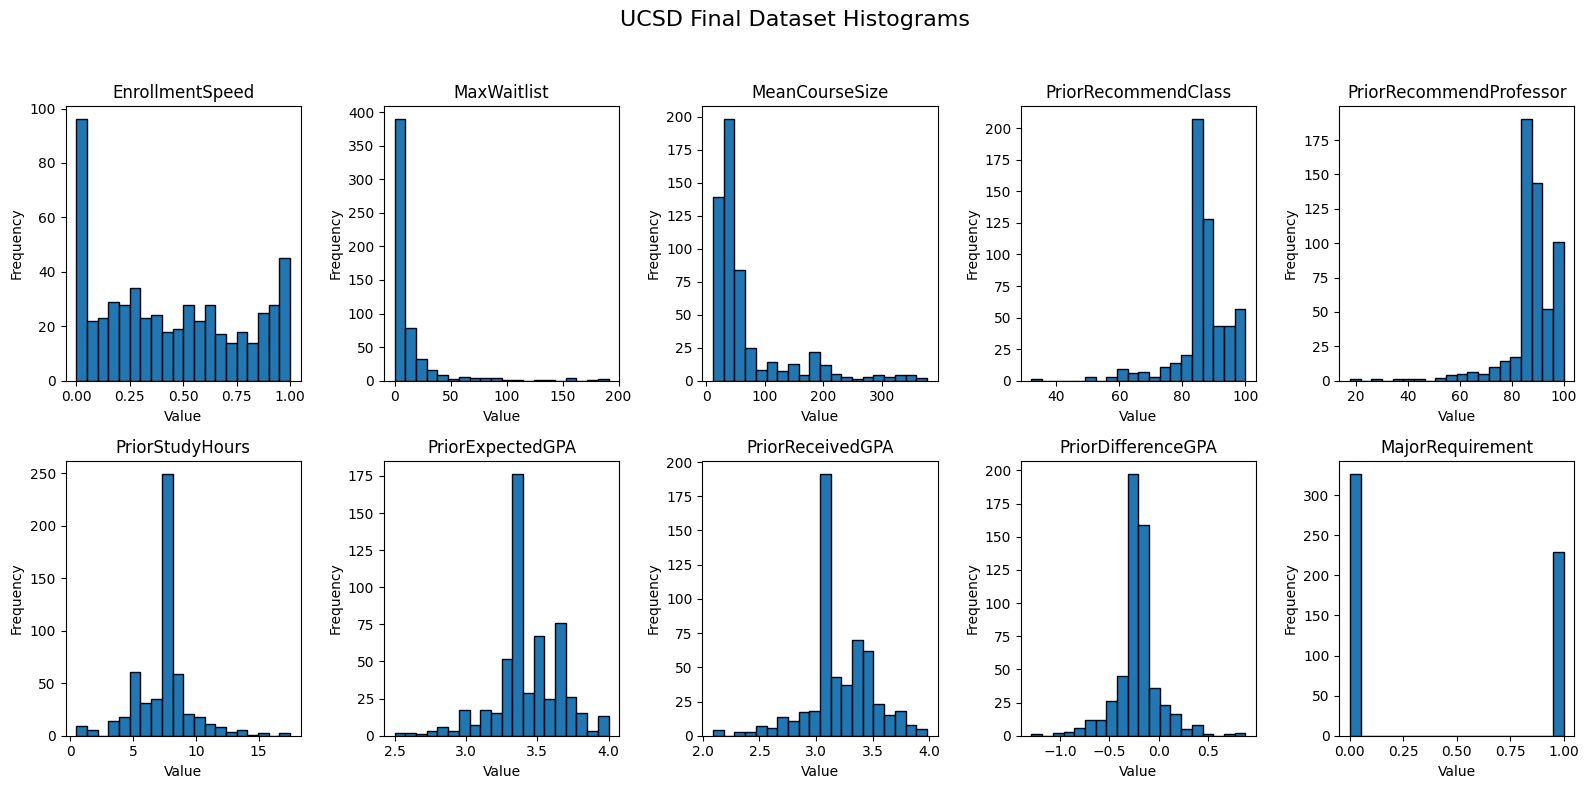

In [ ]:
tempDF = ucsd_final.copy()
tempDF['MajorRequirement'] = tempDF['MajorRequirement'].astype(int) # change this to int for graph

fig, axes = plt.subplots(2, 5, figsize=(16, 8))
fig.suptitle('UCSD Final Dataset Histograms', fontsize=16)
columns = ['EnrollmentSpeed', 'MaxWaitlist', 'MeanCourseSize',  'PriorRecommendClass', 'PriorRecommendProfessor', 'PriorStudyHours', 'PriorExpectedGPA', 'PriorReceivedGPA', 'PriorDifferenceGPA', 'MajorRequirement']

for ax, col in zip(axes.flatten(), columns):
    tempDF[col].hist(ax=ax, bins=20, edgecolor='black')
    ax.set_title(col, fontsize=12)
    ax.set_xlabel('Value', fontsize=10)
    ax.set_ylabel('Frequency', fontsize=10)
    ax.grid(False)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

As we can see, for columns "course/professor recommend ratio", "average/expected/difference GPA", they are close to normal distrubtion, course/professor recommend rate are a bit right skew, but this is understandable because the data shows for most courses, students are more likely to recommend them.

The MaxWaitlistSize are very left skew to zero, this is also understandable because most courses are not filled up at the end of registration time period.

The MeanCourseSize looks strange, it is very left-skew too, but this make sense, because most courses in UCSD are around 10~100 size, we can check this later.

However, the histgram of EnrollmentSpeed are strange, it looks like uniform distribution, there are high number of courses with 0-close and 10-close enrollment speed.

We can go deeper to see what happened in these two attributes.

In [ ]:
tempDF.describe()

,MaxWaitlist,MeanCourseSize,EnrollmentSpeed,FirstPassPrior,FirstPassSeniors,FirstPassJuniors,FirstPassSophomores,FirstPassFirstYear,SecondPassPrior,SecondPassSeniors,SecondPassJuniors,SecondPassSophomores,SecondPassFirstYear,PriorRecommendClass,PriorRecommendProfessor,PriorStudyHours,PriorExpectedGPA,PriorReceivedGPA,PriorDifferenceGPA,MajorRequirement
count,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000
mean,11.907450,67.935247,0.436313,0.909139,0.750111,0.640283,0.544448,0.469594,0.438339,0.376672,0.327241,0.283335,0.250381,86.599294,87.558369,7.372984,3.424076,3.200182,-0.223894,0.412613
std,25.322841,70.384012,0.329550,0.265131,0.277827,0.316179,0.326918,0.323673,0.318209,0.299383,0.284034,0.275403,0.266935,8.286673,9.502276,2.292395,0.236433,0.302479,0.225147,0.492748
min,0.000000,12.000000,0.000000,0.004202,0.004202,0.004202,0.004202,0.004202,0.004202,0.003650,0.004202,0.004202,0.003322,32.100000,17.700000,0.500000,2.500000,2.090000,-1.289898,0.000000
25%,0.000000,30.262711,0.141692,1.000000,0.668044,0.440640,0.290323,0.106686,0.072904,0.046886,0.038462,0.032258,0.027956,84.789447,84.627765,6.500000,3.336113,3.054319,-0.281794,0.000000
50%,3.000000,35.092088,0.397699,1.000000,0.862613,0.750000,0.611940,0.516129,0.456284,0.375000,0.299492,0.213333,0.161290,86.387701,87.964141,7.364879,3.336113,3.133236,-0.270000,0.000000
75%,12.000000,64.211329,0.711097,1.000000,0.942685,0.896072,0.823329,0.750000,0.708497,0.615275,0.540705,0.467829,0.403002,90.100000,93.100000,7.995000,3.600000,3.383302,-0.151940,1.000000
max,191.000000,377.094639,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,100.000000,100.000000,17.500000,4.000000,3.980000,0.880000,1.000000


In [ ]:
strange_enrollmentSpeed = tempDF[(tempDF['EnrollmentSpeed'] <= 0.05) | (tempDF['FirstPassPrior'] == tempDF['SecondPassFirstYear'])]
print('Stange enrollment speed courses number: ')
print(strange_enrollmentSpeed.shape)
strange_enrollmentSpeed.head(5)

Stange enrollment speed courses number: 
(96, 24)


,ID,CourseID,Quarter,Department,MaxWaitlist,MeanCourseSize,EnrollmentSpeed,FirstPassPrior,FirstPassSeniors,FirstPassJuniors,...,SecondPassJuniors,SecondPassSophomores,SecondPassFirstYear,PriorRecommendClass,PriorRecommendProfessor,PriorStudyHours,PriorExpectedGPA,PriorReceivedGPA,PriorDifferenceGPA,MajorRequirement
8,CSE 101-Saha Barna & Jones Miles E-FA22,CSE 101,FA22,CSE,179.000000,377.094639,0.000000,0.004202,0.004202,0.004202,...,0.004202,0.008403,0.004202,87.838069,88.760251,7.976029,3.538405,3.383302,-0.155103,0
14,CSE 105-Micciancio Daniele-FA22,CSE 105,FA22,CSE,78.000000,349.332197,0.000000,0.004425,0.004425,0.004425,...,0.004425,0.004425,0.004425,69.000000,70.200000,8.450000,3.100000,2.900000,-0.200000,1
24,CSE 11-Soosai Raj Adalbert Geral-SP23,CSE 11,SP23,CSE,0.000000,49.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,87.838069,88.760251,7.976029,3.538405,3.383302,-0.155103,1
31,CSE 12-Miranda Gregory Joseph-FA22,CSE 12,FA22,CSE,46.333333,112.352739,0.000000,0.013514,0.013514,0.013514,...,0.013514,0.013514,0.013514,82.600000,66.200000,10.010000,3.390000,3.060000,-0.330000,1
42,CSE 127-Heninger Nadia A-WI23,CSE 127,WI23,CSE,0.000000,205.000000,0.043156,1.000000,0.837379,0.808252,...,0.633495,0.621359,0.618932,86.900000,80.300000,10.030000,3.110000,3.050000,-0.060000,1


So, as we can see, there are some courses with 0 enrollment speed, they are most likely courses that have been cancelled. We try to delete these courses and look at our data again.

(472, 24)


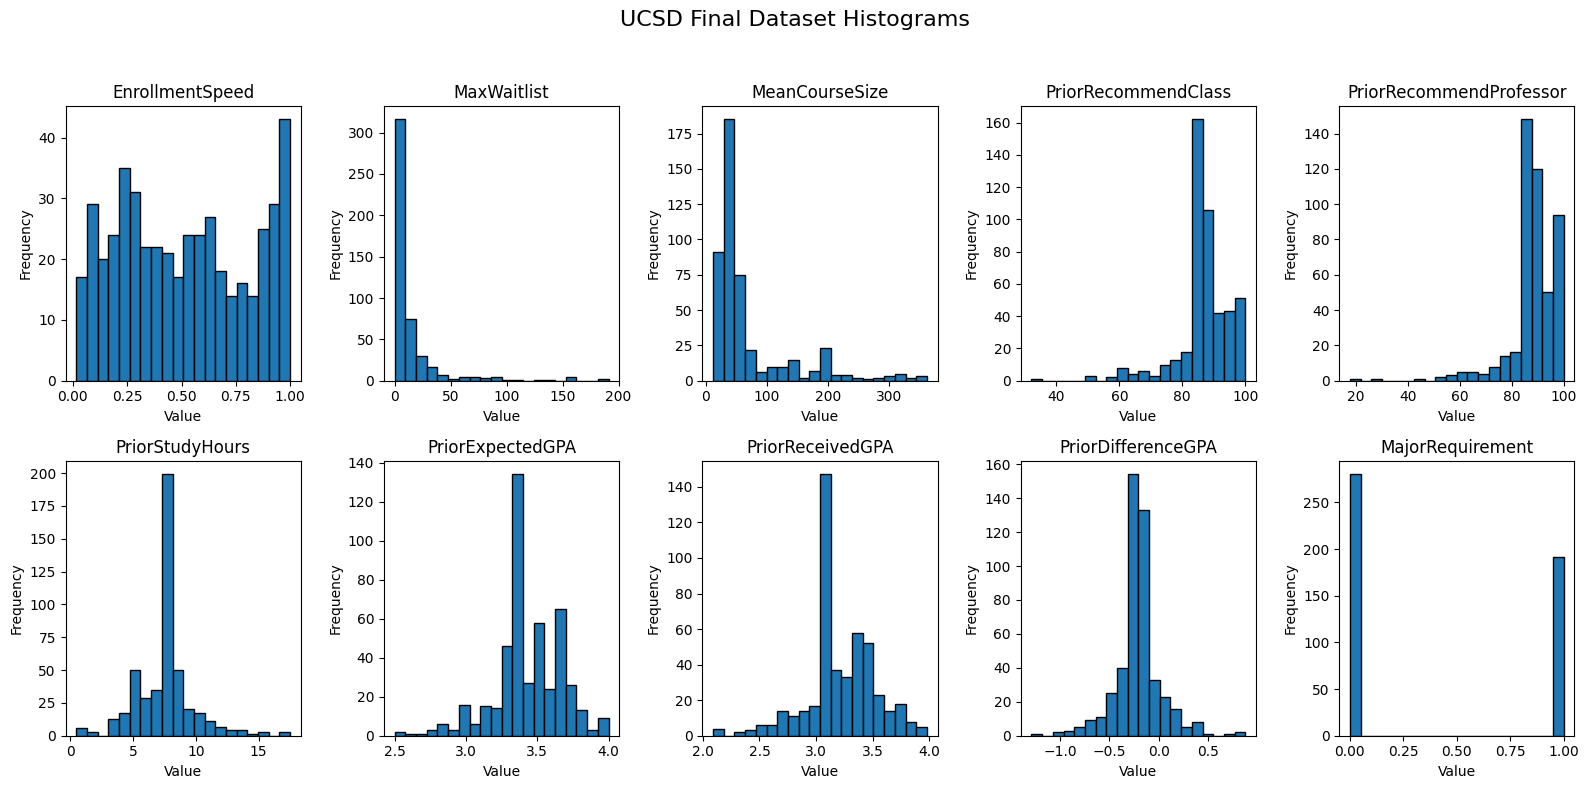

In [ ]:
ucsd_final = ucsd_final[(ucsd_final['EnrollmentSpeed'] > 0.01) & (ucsd_final['MeanCourseSize'] > 10) &(ucsd_final['FirstPassPrior'] != ucsd_final['SecondPassFirstYear'])].reset_index(drop=True)
print(ucsd_final.shape)
tempDF = ucsd_final.copy()
tempDF['MajorRequirement'] = tempDF['MajorRequirement'].astype(int) # change this to int for graph

fig, axes = plt.subplots(2, 5, figsize=(16, 8))
fig.suptitle('UCSD Final Dataset Histograms', fontsize=16)
columns = ['EnrollmentSpeed', 'MaxWaitlist', 'MeanCourseSize',  'PriorRecommendClass', 'PriorRecommendProfessor', 'PriorStudyHours', 'PriorExpectedGPA', 'PriorReceivedGPA', 'PriorDifferenceGPA', 'MajorRequirement']

for ax, col in zip(axes.flatten(), columns):
    tempDF[col].hist(ax=ax, bins=20, edgecolor='black')
    ax.set_title(col, fontsize=12)
    ax.set_xlabel('Value', fontsize=10)
    ax.set_ylabel('Frequency', fontsize=10)
    ax.grid(False)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [ ]:
ucsd_final.to_csv('ucsd_final.csv', index=False)
# files.download('ucsd_final.csv')

Now we have a histogram of all the data. You can see the characteristics of the EnrollmentSpeed column: a large number of courses are registered very quickly, but overall the registration speed of courses is close to a uniform distribution rather than a normal distribution.

One possible explanation we put forward for this is that many courses at UCSD will be filled up quickly, but the university management will manually adjust the size and number of courses based on course data, which results in most courses being filled up quickly. The registration speed is relatively even.

### Enrollment Ratio Trend During First Pass and Second Pass

Our research focuses on the enrollment speed of each course. Therefore, in addition to only check the quantified data "Enrollment Speed" through linear regression, we also want to manually observe the trend of "Enrollment Ratio" for each course under regirestion time period. Here, "Enrollment Ratio" refers to the ratio of the current available seats to the maximum size of each course, i.e., (Available / Total Size).

We know that course registration at UCSD is divided into First Pass and Second Pass. During each Pass's different time periods, students of different grades are allowed to register for a limited number of units of courses. Therefore, we can see the enrollment trend by observe the Enrollment Ratio for each course using First Pass and Second Pass as time division points.

All the necessary data has already been processed during the Data Cleaning step.

First, I'll define a function that can plot the desired graph based on our input. Then, I will plot the mean rnollment trend of each department and quarter.

We expect to see that the enrollment trend in departments/quarters are close to each other.

In [ ]:
tempDF = ucsd_final.copy()

def plot_enrollment_ratio(df=None, id=None, course=None, depart=None, quarter=None, select=None):
    if df is None:
        print('You forget to call with dataset')
        return None

    if select == 'id' and id is not None:
        plot_data = df[df['ID'] == id]
        label_column = 'ID'
    elif select == 'course' and course is not None:
        plot_data = df[df['CourseID'] == course]
        label_column = 'CourseID'
    elif select == 'department' and depart is not None and isinstance(depart, list):
        plot_data = df[df['Department'].isin(depart)].groupby('Department').mean(numeric_only=True).reset_index()
        label_column = 'Department'
    elif select == 'quarter' and quarter is not None and isinstance(quarter, list):
        plot_data = df[df['Quarter'].isin(quarter)].groupby('Quarter').mean(numeric_only=True).reset_index()
        label_column = 'Quarter'
    else:
        print('select or another parameter wrong')
        return None

    if plot_data.empty:
        print('I dont know what you input')
        return None

    fig, ax = plt.subplots(figsize=(8, 5))

    for idx, row in plot_data.iterrows():
        labels = ['FirstPassPrior', 'FirstPassSeniors', 'FirstPassJuniors', 'FirstPassSophomores', 'FirstPassFirstYear',
                  'SecondPassPrior', 'SecondPassSeniors', 'SecondPassJuniors', 'SecondPassSophomores', 'SecondPassFirstYear']

        combined_data = row[labels].values
        label = row[label_column] if select != 'course' else row["ID"]  # if you are drawing a picture for each course, set the label to ID for easy identification.
        ax.plot(labels, combined_data, marker='o', label=label)

    ax.set_title(select)
    ax.set_xlabel('Pass Time')
    ax.set_ylabel('Enrollment Ratio (available / Total Size)')
    ax.grid(True)
    ax.tick_params(axis='x', rotation=45)
    ax.legend(loc='upper right')

    plt.tight_layout()
    return fig

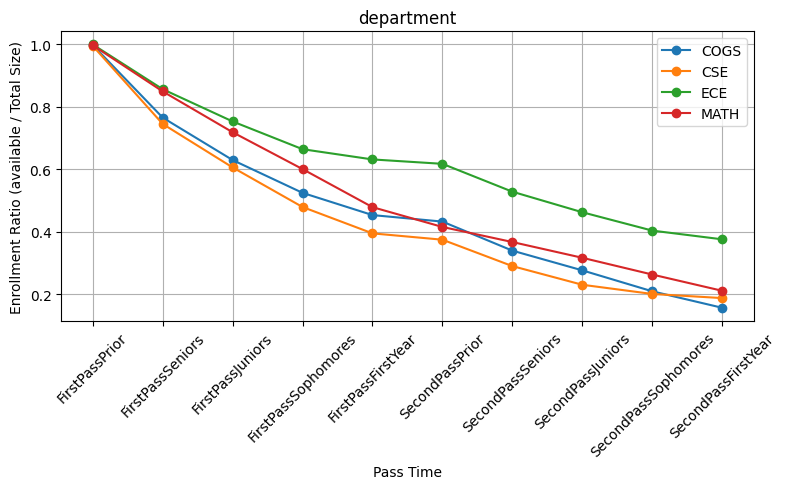

In [ ]:
fig = plot_enrollment_ratio(df = tempDF, depart = ['COGS', 'CSE', 'MATH', 'ECE'], select = 'department')
plt.show()

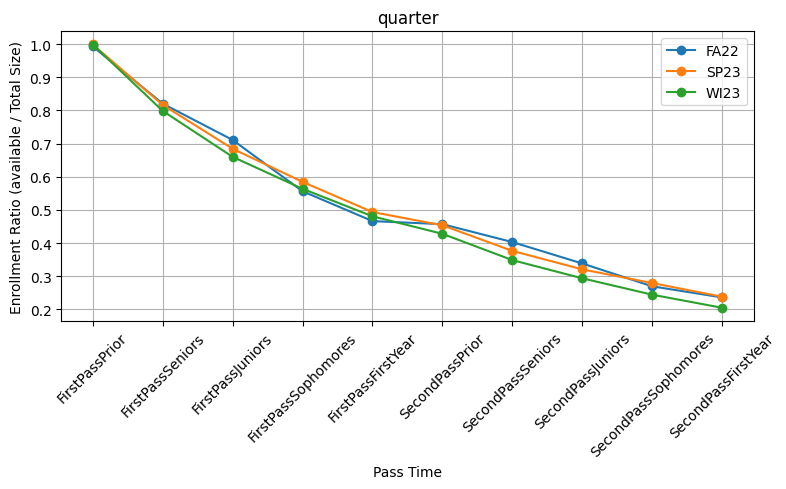

In [ ]:
fig = plot_enrollment_ratio(df = tempDF, quarter = ['SP23', 'WI23', 'FA22'], select = 'quarter')
plt.show()

We can see that the enrollment trends for different departments and quarters are very similar, which is in line with our expectations. Additionally, we notice the changes in the enrollment ratio between First Pass and Second Pass are very small, this is because during this period, most students are not allowed to register for courses.

### Enrollment Speed Crossing Departments and Quarter

Here we want to see for different department and quarter, will the enrollment speed be different.

We expect that there will not be much of a difference in the enrollment speed across departments and quarter, as the only driving factors for the changes are the requirement of the courses and the number of students in the department.



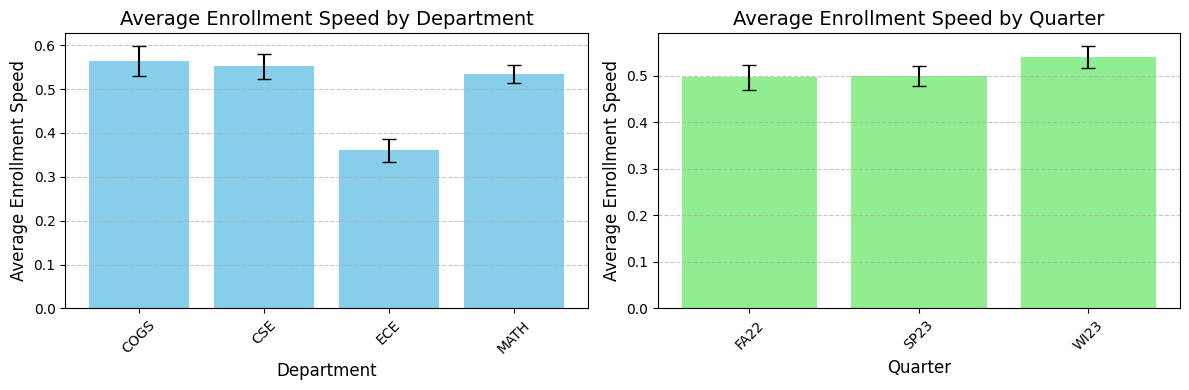

In [ ]:
# average_speeds_department = ucsd_final.groupby('Department')['EnrollmentSpeed'].agg(['mean', 'sem']).reset_index()
# average_speeds_quarter = ucsd_final.groupby('Quarter')['EnrollmentSpeed'].agg(['mean', 'sem']).reset_index()
def plot_average_speeds(data, group_by, title, xlabel, color, ax):
    grouped_data = data.groupby(group_by)['EnrollmentSpeed'].agg(['mean', 'sem']).reset_index()
    ax.bar(grouped_data[group_by], grouped_data['mean'], yerr=grouped_data['sem'], color=color, capsize=5)
    ax.set_title(title, fontsize=14)
    ax.set_xlabel(xlabel, fontsize=12)
    ax.set_ylabel('Average Enrollment Speed', fontsize=12)
    ax.tick_params(axis='x', rotation=45)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
plot_average_speeds(ucsd_final, 'Department', 'Average Enrollment Speed by Department', 'Department', 'skyblue', axes[0]) # for department
plot_average_speeds(ucsd_final, 'Quarter', 'Average Enrollment Speed by Quarter', 'Quarter', 'lightgreen', axes[1]) # for quarter

plt.tight_layout()
plt.show()

Here we can observe that:
- For different quarters, the average enrollment speed of courses is very close, with errors almost negligible. This is in line with our expectation because although the course schedules vary each quarter, the registration patterns of students should not differ significantly.
- For different departments, we can see that the enrollment speeds of COGS, CSE, and MATH are very similar, while the enrollment speed of ECE is noticeably lower. We speculate that this may be due to the following reasons:
  - The number of students in the ECE department is fewer than in the other departments, resulting in a large number of vacancies in each course, leading to slower registration speeds.
  - The number of courses offered by the ECE department is greater than in the other departments, resulting in a large number of vacancies in each course, leading to slower registration speeds.

Let's validate our speculation.

In [ ]:
def print_department_course_size(department):
    department_data = ucsd_final[ucsd_final['Department'] == department]
    course_counts = department_data['CourseID'].value_counts()
    print('Department ', department, ' have ', course_counts.sum(), ' courses recorded. ')

print_department_course_size('COGS')
print_department_course_size('CSE')
print_department_course_size('MATH')
print_department_course_size('ECE')

Department  COGS  have  85  courses recorded. 
Department  CSE  have  112  courses recorded. 
Department  MATH  have  191  courses recorded. 
Department  ECE  have  84  courses recorded. 


For the first speculation regarding the number of students in the department, through online sources, we can find that:
- The ECE department consists of 900 graduate students and 1300 undergraduate students.
- The total number of students in the MATH and COGS departments is difficult to ascertain, but the CSE department has approximately 800 students.

Therefore, our first speculation is incorrect.

Regarding the second speculation, although we can see that the number of courses in the ECE department is the lowest, the number of courses in the COGS department is similarly low, yet the average enrollment speed is not as low as that of the ECE department.

Thereofre, unfortunately, we regret to announce that we have difficulty identifying the reasons for the significantly lower average enrollment speed in the ECE department.

### Realtionship Between Study Hours to Enrollment Speed

Here we anylisis the relation between the course study hours from prior quarter and the course enrollment speed of current quarter.

We expect that the shorter the average study time for the course last semester, the more popular the course will be this semester. Because we think students always perfer to choose the classes that are more relax.

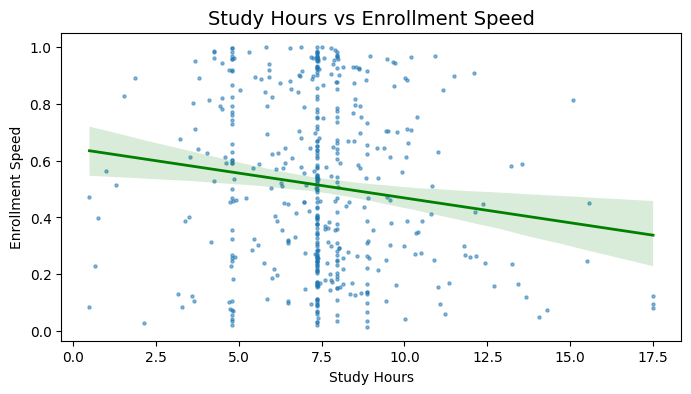

In [ ]:
df = pd.read_csv('ucsd_final.csv')
plt.figure(figsize=(8, 4))
#sns.scatterplot(x='PriorStudyHours', y='EnrollmentSpeed', data=df)
sns.regplot(x='PriorStudyHours', y='EnrollmentSpeed', data=df, scatter_kws={'s':5, 'alpha':0.5}, line_kws={'color':'green', 'lw':2})
plt.title('Study Hours vs Enrollment Speed', fontsize=14)
plt.xlabel('Study Hours', fontsize=10)
plt.ylabel('Enrollment Speed', fontsize=10)
plt.show()

We can see there are about three strange straight line in the graph, those lines are actully caused by our data cleaning, in data clean process above, we set the course with null study hours to be the average value of the whole dataset, that's why we can see those straight lines.

Overall, we examine the relationship between two variables--study hours and enrollment speed. As seen from the graph, the x-axis shows study hours and the y-axis indicates enrollment speed. The regression line reveals a negative correlation, suggesting that as study hours increase, enrollment speed tends to decrease. This inverse relationship indicates that more study hours are associated with a lower enrollment speed, highlighting a trend where higher study hours correlate with slower enrollment speed, which follows what we expected.

### Realtionship Between GPA (Received and Expected) And Enrollment Speed

Here we anylisis the relationship between the course GPA (both receivedand expected) from prior quarter and the course enrollment speed of current quarter.

We expect that the higher GPA recieved and expected in this course from last quarter, the more popular current quarter this course will be, because we believe students are expect to get higher grade, and the higher recieved GPA means better grade, higher expected GPA means the professor are more tend to give better grade or the couese itself is easiser.

Correlation coefficient between Received GPA and Enrollment Speed: 0.13366082754657227
Correlation coefficient between Expected GPA and Enrollment Speed: 0.19755786873992867


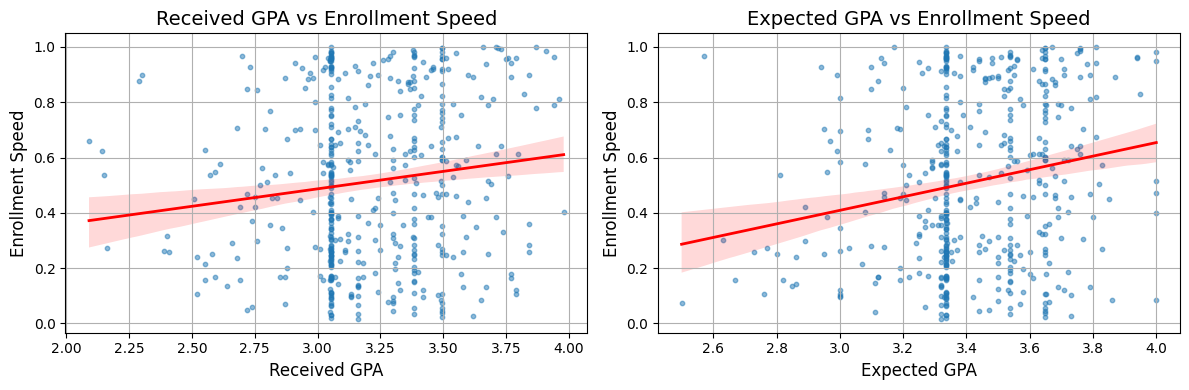

In [ ]:
# plt.figure(figsize=(8, 4))
# #sns.scatterplot(x='PriorReceivedGPA', y='EnrollmentSpeed', data=df)
# sns.regplot(x='PriorReceivedGPA', y='EnrollmentSpeed', data=df)
# plt.title('Received GPA vs Enrollment Speed')
# plt.xlabel('ReceivedGPA')
# plt.ylabel('Enrollment Speed')
# plt.show()

df = pd.read_csv('ucsd_final.csv')
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

#calculate the correlation coefficient, but I will do it again when doing polynomial regression below.
correlation = df['PriorReceivedGPA'].corr(df['EnrollmentSpeed'])
print(f'Correlation coefficient between Received GPA and Enrollment Speed: {correlation}')

# received gpa
sns.regplot(x='PriorReceivedGPA', y='EnrollmentSpeed', data=df, ax=axes[0], scatter_kws={'s':10, 'alpha':0.5}, line_kws={'color':'red', 'lw':2})
axes[0].set_title('Received GPA vs Enrollment Speed', fontsize=14)
axes[0].set_xlabel('Received GPA', fontsize=12)
axes[0].set_ylabel('Enrollment Speed', fontsize=12)
axes[0].grid(True)

correlation = df['PriorExpectedGPA'].corr(df['EnrollmentSpeed'])
print(f'Correlation coefficient between Expected GPA and Enrollment Speed: {correlation}')

# expected gpa
sns.regplot(x='PriorExpectedGPA', y='EnrollmentSpeed', data=df, ax=axes[1], scatter_kws={'s':10, 'alpha':0.5}, line_kws={'color':'red', 'lw':2})
axes[1].set_title('Expected GPA vs Enrollment Speed', fontsize=14)
axes[1].set_xlabel('Expected GPA', fontsize=12)
axes[1].set_ylabel('Enrollment Speed', fontsize=12)
axes[1].grid(True)

plt.tight_layout()
plt.show()

The scatter plot with a regression line examines the relationship between GPA and enrollment speed. The x-axis shows received GPA and the y-axis shows enrollment speed.

First, as we can notice and mentioned before, there are several straight lines, those lines are caused by the data cleaning process, we fill the null value by the average value, which causes those straight lines.

Then, although we can see the regression line reveals a positive correlation, suggesting that as both received and expected GPA increases, enrollment speed also tends to increase, the slope of it is still very small, which means:

- **Slight Trend:** The red line has a slight upward tilt, indicating a very weak relationship between both GPA and enrollment speed. As students' received and expected GPA increases, the enrollment speed increases very slightly.

- **Wide Spread:** The blue dots are scattered all over, suggesting that expected GPA doesn't consistently predict enrollment speed. There are students with high received and expected GPAs who enroll quickly and slowly, and the same for those with lower GPAs.

Overall, although the graph follows our expection, the plot shows that students' expectations of their grades have a very minimal influence on how quickly they enroll in courses.

### Relationship between Difference GPA And Professor Recommend Rate



In addition to anylsis the enrollment speed, we also curious what affect the recommend rate of professor. Will there a relationship between GPAs (received, expected, difference) and professor recommend rate?

We expect that a higher received/expected GPA and smaller difference between expected and received GPA will correlate with higher professor recommendation rates because students tend to rate professors more favorably when their academic expectations are met or exceeded. This relationship can help universities understand how grading practices influence student satisfaction and faculty evaluations.

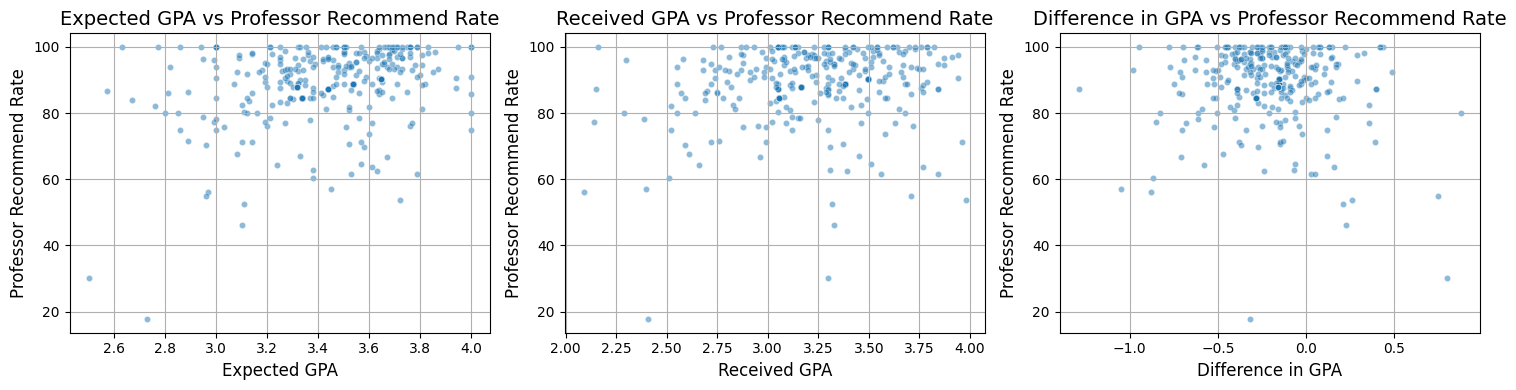

In [ ]:
df = ucsd_final.copy()

fig, axes = plt.subplots(1, 3, figsize=(15, 4))
def plot_scatter(ax, x, y, title, xlabel, ylabel):
    sns.scatterplot(data=df, x=x, y=y, s=20, alpha=0.5, ax=ax)
    ax.set_title(title, fontsize=14)
    ax.set_xlabel(xlabel, fontsize=12)
    ax.set_ylabel(ylabel, fontsize=12)
    ax.grid(True)

plot_scatter(axes[0], 'PriorExpectedGPA', 'PriorRecommendProfessor', 'Expected GPA vs Professor Recommend Rate', 'Expected GPA', 'Professor Recommend Rate')
plot_scatter(axes[1], 'PriorReceivedGPA', 'PriorRecommendProfessor', 'Received GPA vs Professor Recommend Rate', 'Received GPA', 'Professor Recommend Rate')
plot_scatter(axes[2], 'PriorDifferenceGPA', 'PriorRecommendProfessor', 'Difference in GPA vs Professor Recommend Rate', 'Difference in GPA', 'Professor Recommend Rate')

plt.tight_layout()
plt.show()

As we can see, for the three GPA variables, professor recommendation rates are mostly concentrated in the upper-middle part of the chart, indicating that:
- In most cases, students tend to recommend professors.
- The majority of GPAs are clustered around 3.0 to 3.2.
- Most courses have not achieved the expected GPA.

However, from the chart alone, it's difficult to discern the relationship between GPAs and professor recommendation rates. Next, we will analyze these variables using OLS.

In [ ]:
X = df[['PriorExpectedGPA', 'PriorReceivedGPA', 'PriorDifferenceGPA']]
y = df['PriorRecommendProfessor']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

print(model.summary2())

                     Results: Ordinary least squares
Model:              OLS                     Adj. R-squared:     0.093    
Dependent Variable: PriorRecommendProfessor AIC:                3411.4119
Date:               2024-06-09 23:17        BIC:                3423.8828
No. Observations:   472                     Log-Likelihood:     -1702.7  
Df Model:           2                       F-statistic:        25.16    
Df Residuals:       469                     Prob (F-statistic): 4.19e-11 
R-squared:          0.097                   Scale:              80.106   
--------------------------------------------------------------------------
                       Coef.   Std.Err.     t     P>|t|    [0.025   0.975]
--------------------------------------------------------------------------
const                 46.2010    5.9213   7.8026  0.0000  34.5655  57.8365
PriorExpectedGPA       8.2115    1.2294   6.6792  0.0000   5.7956  10.6273
PriorReceivedGPA       3.9623    0.8738   4.5345  0.00

After analyzing the data, we found that:
- The R-squared coefficient is very small, whcih means that we cannot predict the professor recommendation rate well by given GPAs.
- Expected and received GPA are positively correlated with professor recommendation rates, while difference GPA is negatively correlated with professor recommendation rates, which follows our expection, and we can see that the expected GPA have higher correlation to recommendation rate.
- The p-values of each variables are all very small (almost 0), whcih means although we cannot predict the recommendation rate well, we still can reject the null hypothesis.

### Relationship Between Course Required for Major And Enrollment Speed



Here we analyze how a major that requires a specific course will affect its enrollment speed.

We expect that the classes that are required for majors are more likely to have a higher enrollment speed, because student should be more tend to enroll the major requirement courses for graduation.

We will first plot the histogram of the enrollment speed of each departments markded by requirement, then check the whole dataset distribution.

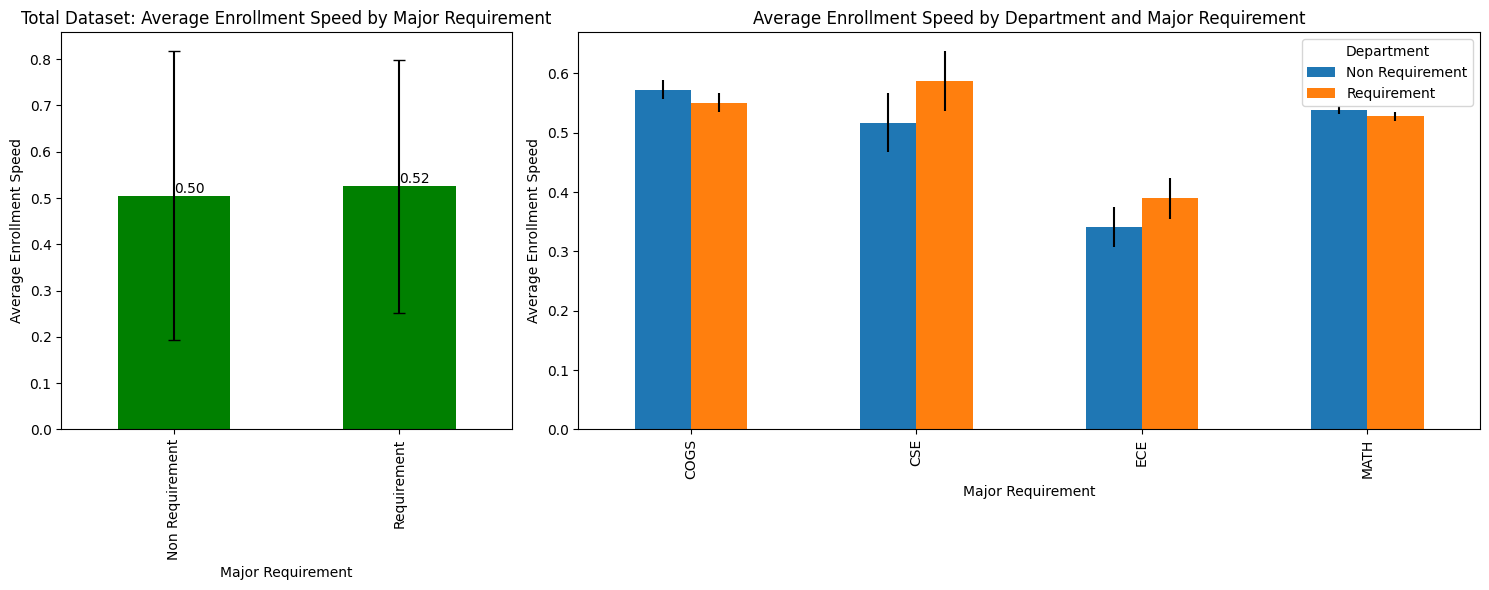

In [ ]:
df = ucsd_final.copy()
df['MajorRequirement'] = df['MajorRequirement'].replace({0: 'Non Requirement', 1: 'Requirement'})

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6), gridspec_kw={'width_ratios': [1, 2]})

department_major_enrollmentSpeed = df.groupby(['Department', 'MajorRequirement'])['EnrollmentSpeed'].mean().unstack()
department_means = department_major_enrollmentSpeed.mean(axis=1)
department_errors = department_major_enrollmentSpeed.std(axis=1)
department_major_enrollmentSpeed.head()

# by department, view major and non-major requirements
department_major_enrollmentSpeed.plot(kind='bar', ax=ax2, yerr = department_errors)
ax2.set_title('Average Enrollment Speed by Department and Major Requirement')
ax2.set_xlabel('Major Requirement')
ax2.set_ylabel('Average Enrollment Speed')
ax2.legend(title='Department')

# check whole dataset
grouped_major = df.groupby('MajorRequirement')['EnrollmentSpeed'].mean()
major_errors = df.groupby('MajorRequirement')['EnrollmentSpeed'].std()
bars = grouped_major.plot(kind='bar', yerr=major_errors, capsize=4, ax=ax1, color='green')
for bar in bars.patches:
    ax1.text( bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{bar.get_height():.2f}', ha='left', va='bottom')
ax1.set_title('Total Dataset: Average Enrollment Speed by Major Requirement')
ax1.set_xlabel('Major Requirement')
ax1.set_ylabel('Average Enrollment Speed')

plt.tight_layout()
plt.show()

In this visual the X axis shows the difference between a course that is and is not a major requirement sectioned off respectfully (for ledt diagram, it also grouped by departments). The Y axis shows the average enrollment speed of a major required course or non-major required course.

For the overall dataset, surprisingly the average of a required major course and non-required major course are extremely similar and there are no significant differences. While a T-test was not done to confirm this informaition, looking at the results prior to them being rounded, they are extremely similar with only around a 0.02 difference in enrollment speed. We calculated this visualization because we thought there might be a signifcant difference between the required or non-required courses but there is not and ultimately  do not effect the speed in which a course is enrolled.

For the different enrollment speeds of Major Requirement across each department, we observe that:
- In the CSE and ECE departments, the enrollment speeds align with our expectations. However, in the COGS and MATH departments, courses that are not major requirements actually enroll faster than those that are.
- Overall, there is minimal difference in enrollment speed between major and non-major courses in the COGS and MATH departments, whereas the difference is more pronounced in the CSE and ECE departments.

Overall, the impact of major and non-major courses on enrollment speed is not as significant as anticipated. One possible explanation we propose is that the management at UCSD may have adjusted major courses to balance enrollment speeds. Based on our typical registration experiences, we believe that major courses often have larger class sizes (typically around 100 students), which may contribute to the lack of significant difference in enrollment speed for major courses. Let's validate our hypothesis.

Major requirement mean course size:  87.82903538685143
Non-major requirement mean course size:  55.94496995864124


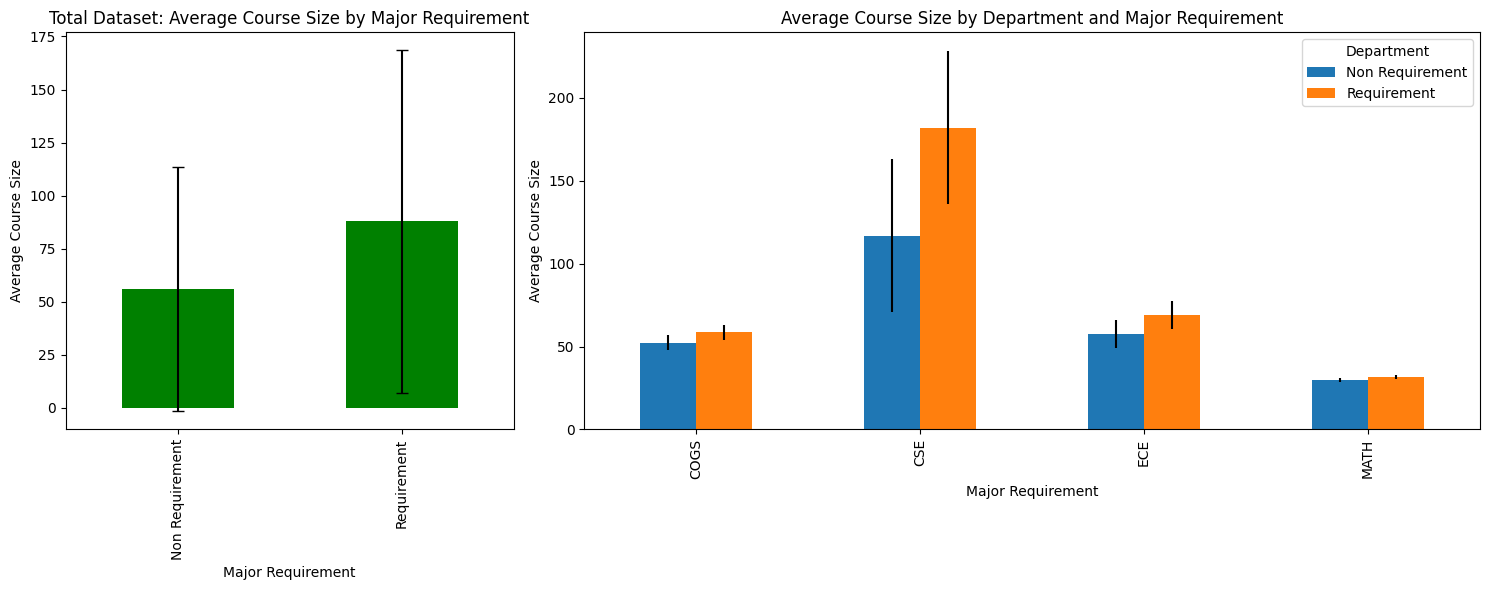

In [ ]:
df = ucsd_final.copy()
df_major = df[df['MajorRequirement'] == 1]
df_non_major = df[df['MajorRequirement'] == 0]
print('Major requirement mean course size: ', df_major['MeanCourseSize'].mean())
print('Non-major requirement mean course size: ', df_non_major['MeanCourseSize'].mean())

df['MajorRequirement'] = df['MajorRequirement'].replace({0: 'Non Requirement', 1: 'Requirement'})

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6), gridspec_kw={'width_ratios': [1, 2]})

department_major_courseSize = df.groupby(['Department', 'MajorRequirement'])['MeanCourseSize'].mean().unstack()
department_means = department_major_courseSize.mean(axis=1)
department_errors = department_major_courseSize.std(axis=1)
department_major_courseSize.head()

# by department, view major and non-major requirements
department_major_courseSize.plot(kind='bar', ax=ax2, yerr=department_errors)
ax2.set_title('Average Course Size by Department and Major Requirement')
ax2.set_xlabel('Major Requirement')
ax2.set_ylabel('Average Course Size')
ax2.legend(title='Department')

# check whole dataset
grouped_major = df.groupby('MajorRequirement')['MeanCourseSize'].mean()
major_errors = df.groupby('MajorRequirement')['MeanCourseSize'].std()
bars = grouped_major.plot(kind='bar', yerr=major_errors, capsize=4, ax=ax1, color='green')

ax1.set_title('Total Dataset: Average Course Size by Major Requirement')
ax1.set_xlabel('Major Requirement')
ax1.set_ylabel('Average Course Size')

plt.tight_layout()
plt.show()


As we can see, across the entire dataset, it's evident that the average course size of major courses is significantly larger than that of non-major courses.

Moreover, upon examining each department, we can observe that the disparity in course sizes is primarily driven by the CSE department, while the gaps in course sizes are minimal in the COGS and ECE departments, and Math courses are nearly identical. This discrepancy also correlates well with the likelihood that course enrollment speed is indeed influenced by course size. Overall, we believe our hypothesis successfully explains, to some extent, the difference in enrollment speed between major and non-major courses.

### Relationship Between Recommended Rate (Professor and Course) And Enrollment Speed

Here we analyze the relationship between the course recommend rate from prior quarter and the course enrollment speed of current quarter.

We expect that there to be a positive correlation between the professor/course recommended rate and the enrollment speed as people will want to be in a class with the popular professors and courses, which increasing their chances of success.

Correlation coefficient between Class Recommend Rate and Enrollment Speed: 0.12509339733695696
Correlation coefficient between Professor Recommend Rate and Enrollment Speed: 0.10240088256589723


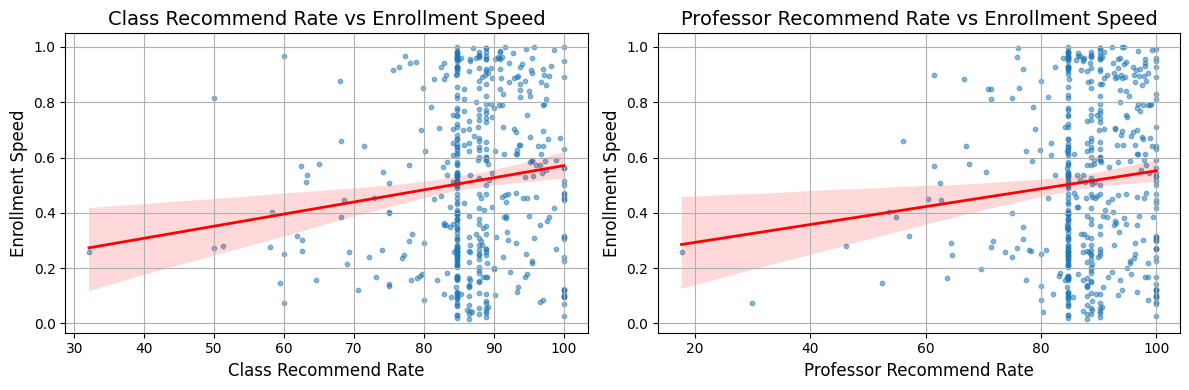

In [ ]:
df = pd.read_csv('ucsd_final.csv')
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

#calculate the correlation coefficient, but I will do it again when doing polynomial regression below.
correlation = df['PriorRecommendClass'].corr(df['EnrollmentSpeed'])
print(f'Correlation coefficient between Class Recommend Rate and Enrollment Speed: {correlation}')

# received gpa
sns.regplot(x='PriorRecommendClass', y='EnrollmentSpeed', data=df, ax=axes[0], scatter_kws={'s':10, 'alpha':0.5}, line_kws={'color':'red', 'lw':2})
axes[0].set_title('Class Recommend Rate vs Enrollment Speed', fontsize=14)
axes[0].set_xlabel('Class Recommend Rate', fontsize=12)
axes[0].set_ylabel('Enrollment Speed', fontsize=12)
axes[0].grid(True)

correlation = df['PriorRecommendProfessor'].corr(df['EnrollmentSpeed'])
print(f'Correlation coefficient between Professor Recommend Rate and Enrollment Speed: {correlation}')

sns.regplot(x='PriorRecommendProfessor', y='EnrollmentSpeed', data=df, ax=axes[1], scatter_kws={'s':10, 'alpha':0.5}, line_kws={'color':'red', 'lw':2})
axes[1].set_title('Professor Recommend Rate vs Enrollment Speed', fontsize=14)
axes[1].set_xlabel('Professor Recommend Rate', fontsize=12)
axes[1].set_ylabel('Enrollment Speed', fontsize=12)
axes[1].grid(True)

plt.tight_layout()
plt.show()

In this visualization, the X axis shows the percentage of recommendation a course has and the Y axis shows the enrollment speed of that course. Additionally there is a line of best fit to help analyze the placement and scatter of the plotted points.

In this visualization we can see that there is a positive slope between the enrollment of a course and both percentage recommendeds which endorses our hypothesis. We calculated this correlation because from our own experience we know that we are more likely to enroll in a course or a professor if they has a high level of recommendation since it likely means the course will be more enjoyable.  

However, this positive relationship is very weak (the slope of the line is very small), indicating that the relationship between recommendation rate and course enrollment speed may not be as tight as we initially assumed. We will carefully examine this further in subsequent analyses.

### Overall HeatMap

Our study focuses on the relationship between course information and course enrollment speed. To summarize our analysis above, we generated a heatmap for our dataset to examine the correlation between each variable and EnrollmentSpeed.

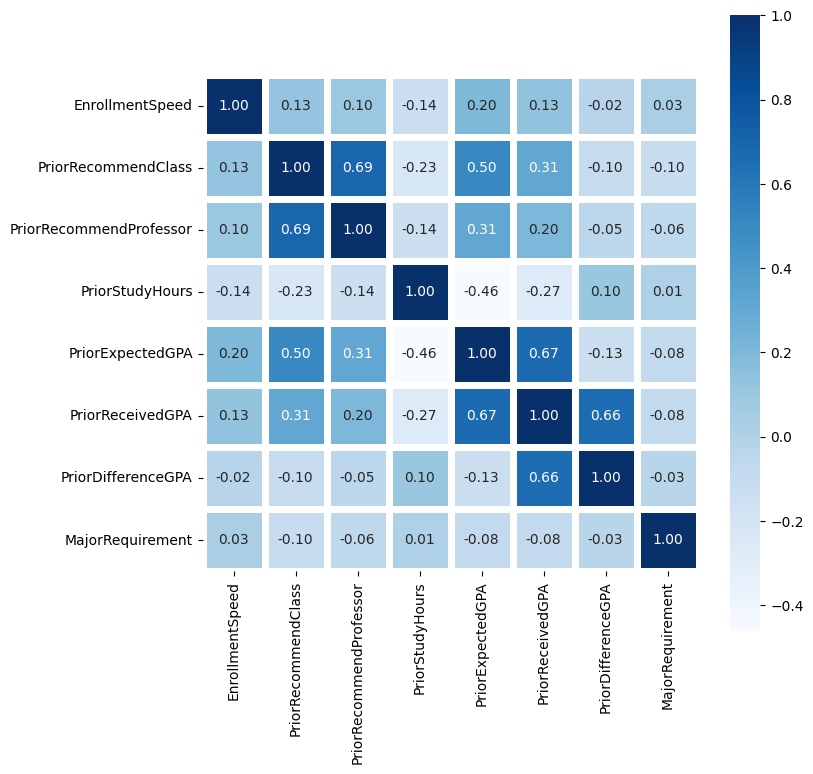

In [ ]:
tempDF = ucsd_final.copy()
tempDF = tempDF[['EnrollmentSpeed', 'PriorRecommendClass', 'PriorRecommendProfessor',
        'PriorStudyHours', 'PriorExpectedGPA', 'PriorReceivedGPA', 'PriorDifferenceGPA', 'MajorRequirement']]
tempDF['MajorRequirement'] = tempDF['MajorRequirement'].astype(int)
plt.figure(figsize=(8, 8))
sns.heatmap(tempDF.corr(numeric_only=True), annot=True, fmt='.2f', cmap='Blues', square=True, linewidths=5)
plt.show()

As seen in the HeatMap, there is not a strong correlation between other course information and EnrollmentSpeed. The highest correlation is with PriorExpectedGPA, showing a positive coefficient of 0.2 with EnrollmentSpeed, followed by PriorStudyHour with a negative coefficient of -0.11.

This shows that we may not be able to reject the null hypothesis, meaning there is no substantial correlation between the existing course information and the speed of course enrollment.

### Predicts Enrollment Speed

Next, we want to predict Enrollment Speed using all available attributes, we can use this to check if there is a enough relationship between the attributes we have and the enrollment speed.

Since we have multiple independent variables and Enrollment Speed is a continuous variable, we decided to use polynomial regression first. This is a machine learning model that processes inputs through polynomials to generate outputs.

#### Model Training And Evulation
Polynomial regression involves selecting a hyperparameter, which is the highest degree of the polynomial regression. To obtain the best model, I will use cross-validation to select the optimal highest degree, and then train and evaluate the model at this degree.

First, let's extract data from our dataset and split it into training and testing sets.

Then we begin cross-training to see which degree performs best and train the model accordingly. We also save the training set error and test set error for future analysis.

Finally we will check the training and testing R2 score of the best model we have.

In [ ]:
tempRegDF = ucsd_final.copy()
x_data = tempRegDF[[ 'PriorRecommendClass', 'PriorRecommendProfessor', 'PriorStudyHours',
       'PriorExpectedGPA', 'PriorReceivedGPA', 'PriorDifferenceGPA', 'MajorRequirement']]
x_data = pd.get_dummies(x_data, drop_first=True) # change to number value

y_data = tempRegDF['EnrollmentSpeed']
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=108)

degree_range = range(1, 20)
p_cross_scores = []
p_train_scores = []
p_test_scores = []
for degree in degree_range:
    poly_reg = PolynomialFeatures(degree=degree)
    x_poly_train = poly_reg.fit_transform(x_train)
    x_poly_test = poly_reg.transform(x_test)
    model = LinearRegression()
    model.fit(x_poly_train, y_train)
    # cross-validation R2 score, accuracy is useless, this is not a classification model
    cross_scores = cross_val_score(model, x_poly_train, y_train, cv=5, scoring='r2')
    p_cross_scores.append(cross_scores.mean())
    # train R2 score
    y_train_pred = model.predict(x_poly_train)
    p_train_scores.append(r2_score(y_train, y_train_pred))
    # test R2 score
    y_test_pred = model.predict(x_poly_test)
    p_test_scores.append(r2_score(y_test, y_test_pred))

best_degree = degree_range[np.argmax(p_cross_scores)]
print('By cross validation, the best degree is: ', best_degree)

poly_reg = PolynomialFeatures(degree=best_degree)
x_poly_train = poly_reg.fit_transform(x_train)
x_poly_test = poly_reg.transform(x_test)

poly_model = LinearRegression()
poly_model.fit(x_poly_train, y_train)

y_train_pred = poly_model.predict(x_poly_train)
y_test_pred = poly_model.predict(x_poly_test)

print('Training Set R2 score: ', r2_score(y_train, y_train_pred))
print('Test Set R2 score: ', r2_score(y_test, y_test_pred), '\n')

By cross validation, the best degree is:  1
Training Set R2 score:  0.04138660982663367
Test Set R2 score:  0.04881957546177973 



As we can see, even though we already pick the best model from degree=1 to degree=20, the R2 score of the model still very bad (almost to 0).

Next, let's compare the performance of the model across different degrees.

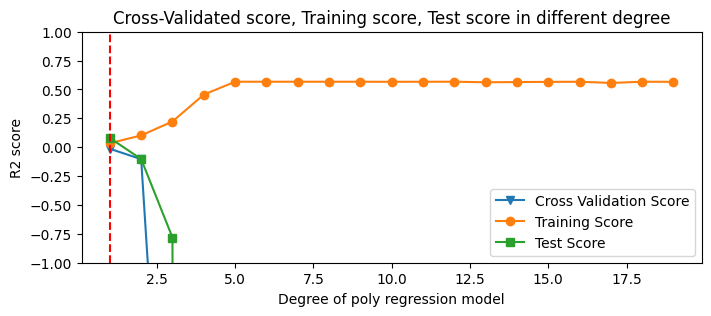

In [ ]:
plt.figure(figsize=(8, 3))

plt.plot(degree_range, p_cross_scores, label='Cross Validation Score', marker='v')
plt.plot(degree_range, p_train_scores, label='Training Score', marker='o')
plt.plot(degree_range, p_test_scores, label='Test Score', marker='s')

plt.xlabel('Degree of poly regression model')
plt.ylabel('R2 score')
plt.title('Cross-Validated score, Training score, Test score in different degree')

plt.axvline(x=best_degree, color='r', linestyle='--')

plt.ylim(-1, 1)
plt.legend()
plt.show()

**Observations**: As we can see, with the increase in degree, the model gradually reaches around a 50% R2 score on the training set and stabilizes. However, in the testing set and cross-validation, the accuracy of the model sharply declines.

**Explanations**: This makes sense because for polynomial regression, as the maximum degree increases, the model quickly overfits the training set, which is why the model performs better and stabilizes quickly on the training set. However, for the testing set and cross-validation, an overfitted model leads to very poor predictive results.

#### OLS Report From Satesmodel

However, although we have a very bad R-squard score, is this enough to say we have a null hypothesis, which means there is no relationship between the course information (GPAs, study hours, recommend rate) and the enrollment speed?

By our previuos anylsis, we can see that there indeed exist some relationship between them, for example, we can clearly see that the GPAs have positive relationship to course enrollment speed, and study hours have negative relationship.

Therefore, to validate if there is a null hypothesis, we decided to use statesmodel to generate OLS report, and check the p-value to validate our hypothesis.

In [ ]:
tempRegDF = ucsd_final.copy()
X = tempRegDF[['PriorRecommendClass', 'PriorRecommendProfessor', 'PriorStudyHours',
               'PriorExpectedGPA', 'PriorReceivedGPA', 'PriorDifferenceGPA', 'MajorRequirement']]
X = sm.add_constant(X)
y = tempRegDF['EnrollmentSpeed']

model = sm.OLS(y, X).fit()
print(model.summary2())

                   Results: Ordinary least squares
Model:                 OLS               Adj. R-squared:      0.034   
Dependent Variable:    EnrollmentSpeed   AIC:                 184.9070
Date:                  2024-06-10 00:25  BIC:                 214.0059
No. Observations:      472               Log-Likelihood:      -85.454 
Df Model:              6                 F-statistic:         3.725   
Df Residuals:          465               Prob (F-statistic):  0.00125 
R-squared:             0.046             Scale:               0.085363
----------------------------------------------------------------------
                         Coef.  Std.Err.    t    P>|t|   [0.025 0.975]
----------------------------------------------------------------------
const                   -0.2625   0.2556 -1.0269 0.3050 -0.7648 0.2398
PriorRecommendClass      0.0003   0.0024  0.1239 0.9015 -0.0045 0.0051
PriorRecommendProfessor  0.0013   0.0020  0.6693 0.5036 -0.0026 0.0053
PriorStudyHours         -0

Through the OLS report, particularly the p-values, we observe that:
- The overall R-squared score is similar to our polynomial regression model results, both of which are quite low.
- Slopes of all artibutes follows our hypothesis.
- The relationship between course recommendation rate and enrollment speed may be minimal, especially considering the p-value for professor recommendation rate is as high as 0.9.
- There might be some association between course study time and major requirement with enrollment speed, but their p-values are also around 0.2 to 0.3.
- There is a significant correlation between expected GPA, actual GPA, and course enrollment speed, with p-values less than 0.05 for both.

Based on our observations, let's include only GPAs as attributes and retrain the model. We expect this to filter out irrelevant attributes and improve the predictive performance of our model.

By cross validation, the best degree is:  1
Training Set R2 score:  0.03298241832191007
Test Set R2 score:  0.06066172865002073


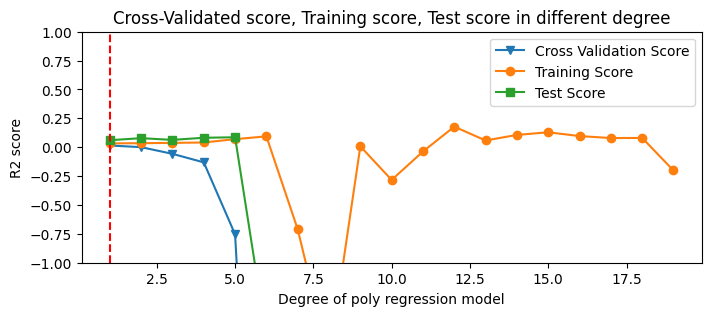

In [ ]:
tempRegDF = ucsd_final.copy()
x_data = tempRegDF[['PriorExpectedGPA', 'PriorReceivedGPA']]
x_data = pd.get_dummies(x_data, drop_first=True) # change to numerical

y_data = tempRegDF['EnrollmentSpeed']
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=108)

degree_range = range(1, 20)
p_cross_scores = []
p_train_scores = []
p_test_scores = []
for degree in degree_range:
    poly_reg = PolynomialFeatures(degree=degree)
    x_poly_train = poly_reg.fit_transform(x_train)
    x_poly_test = poly_reg.transform(x_test)
    model = LinearRegression()
    model.fit(x_poly_train, y_train)
    cross_scores = cross_val_score(model, x_poly_train, y_train, cv=5, scoring='r2')
    p_cross_scores.append(cross_scores.mean())
    # train R2 score
    y_train_pred = model.predict(x_poly_train)
    p_train_scores.append(r2_score(y_train, y_train_pred))
    # test R2 score
    y_test_pred = model.predict(x_poly_test)
    p_test_scores.append(r2_score(y_test, y_test_pred))

best_degree = degree_range[np.argmax(p_cross_scores)]
print('By cross validation, the best degree is: ', best_degree)

poly_reg = PolynomialFeatures(degree=best_degree)
x_poly_train = poly_reg.fit_transform(x_train)
x_poly_test = poly_reg.transform(x_test)

poly_model = LinearRegression()
poly_model.fit(x_poly_train, y_train)

y_train_pred = poly_model.predict(x_poly_train)
y_test_pred = poly_model.predict(x_poly_test)

print('Training Set R2 score: ', r2_score(y_train, y_train_pred))
print('Test Set R2 score: ', r2_score(y_test, y_test_pred))

plt.figure(figsize=(8, 3))

plt.plot(degree_range, p_cross_scores, label='Cross Validation Score', marker='v')
plt.plot(degree_range, p_train_scores, label='Training Score', marker='o')
plt.plot(degree_range, p_test_scores, label='Test Score', marker='s')

plt.xlabel('Degree of poly regression model')
plt.ylabel('R2 score')
plt.title('Cross-Validated score, Training score, Test score in different degree')

plt.axvline(x=best_degree, color='r', linestyle='--')

plt.ylim(-1, 1)
plt.legend()
plt.show()

After removing irrelevant attributes, we can see that although there is a slight improvement in the fit of the model, as indicated by the fitting plot showing less abrupt decline in the earlier degrees, overall, the R-squared score remains quite poor. When including only course GPA as a variable, the model performs slightly better on the test set by 0.02, while performing worse on the training set.

#### Conclusion Of Model Prediction

Our polynoimal regression model performs very poorly on both the testing and training sets. Even with selecting the best hyperparameters through cross-validation, we still only achieve R2 scores close to 0, indicating very low predictive accuracy for our model.

In our observations of models with different degrees, we find that even for high-degree models, our model only achieves around 50% R2 score when highly overfitting on the training set. This suggests that even under the best circumstances, our model falls short.

However, upon validation of the attributes using the OLS method in statsmodels, we can see that the slopes of all attributes indicate they align with our hypothesis expectations (i.e., a positive relationship between recommendation rate and GPA with enrollment speed, and a negative relationship between study time and enrollment speed). However, based on the p-values, we can determine that only the association between expected GPA, received GPA, and enrollment speed can be established.

After discarding irrelevant variables and including only expected GPA and received GPA, we retrained the model and conducted testing. While there was a slight improvement in the R-squared results of the test, it still remained very weak. This suggests that accurately predicting course enrollment speed based on our existing data and attributes is almost impossible.

# Ethics & Privacy

In the process of collecting and using the data, it is foreseeable that we will inevitably obtain information associated with real names, such as the GPA of UCSD students and the ratings of UCSD professors, which poses significant risks of privacy disclosure. To address this issue, we will carefully inspect our data and perform cleaning and anonymization processes, such as replacing real names with numerical codes and only using data that are helpful for our analysis, to ensure that the privacy of real individuals is not compromised.

In the process of collecting the data, we may need to scrape data from websites. However, not all websites necessarily permit data scraping. For this issue, we will carefully review the terms of use of the websites and ensure that we only use data that we are permitted to use.

For bias in the data, since we will be collecting professor ratings, these ratings will primarily reflect students' perceptions of the professors. This is likely to include many biases from students (for example, students who received low GPAs may tend to give professors more negative ratings). These biases are difficult to detect and address. our possible solution is to collect data from as many sources as possible and integrate them to mitigate the impact of biases.

For the analysis process, avoid interveiwing/asking students or professors for information to add to our data set.

For the post-analysis, our analysis (and the models we build) may impact professors and students in real life. For professors, their reputation may be harmed due to potential biases in our analysis. For students, their enrollment may be influenced by our analysis results and models. To address this issue, we will clean our data and anonymize all real information such as names.


# Discussion and Conclusion

Our analysis indicates that our hypothesis is partially correct. We believed that the course enrollment speed (measured as available/course size) in UCSD's CSE, COGS, ECE, and MATH departments correlates positively with the courses' previous Expected GPA and Received GPA, but it shows no significant relationship with the courses' CAPES recommendation rate, the professors' CAPES recommendation rates, or the average study time per course.

Specifically, while our data analysis found correlations that aligned with our hypothesis between each attribute and enrollment speed, the statesmodel's OLS report showed that only Expected GPA and Received GPA had sufficiently small P-values (<0.05). This finding is the main reason we believe these factors are strongly associated with enrollment speed.

For predicting enrollment speed, we developed two polynomial regression models: one using all our attributes, and the other only using the attributes strongly correlated with enrollment speed (Expected and Received GPAs). The first model had average performance on both training and test sets (0.041, 0.048), while the second showed better results on the test set (0.032, 0.06). Overall, both models' R-squared scores were significantly below acceptable levels, indicating very low precision in our predictions.

The reasons for these outcomes may include the following. Firstly, we suspect that UCSD's course enrollment speeds might be subject to administrative adjustments. When examining the distribution of enrollment speeds across the four departments, they do not appear normally distributed but rather closer to a uniform distribution. As mentioned in our prior work ("The scramble for scheduling" from UCSD The GUARDIAN), we believe that the administration adjusts courses based on their enrollment speed, including but not only increasing sizes of popular courses, decreasing sizes of less popular ones, and modifying pre-requirements, among other measures, to balance overall enrollment speeds at UCSD.

Secondly, our method of quantifying enrollment speed might be inappropriate for this study. In our research, we used linear regression and weighted methods to calculate course enrollment speeds (as detailed in our Data Cleaning Process). This approach might not be suitable, and to improve our results, we might need to find a new method to measure the pace of course enrollment accurately.

Overall, we believe the best way to predict course enrollment speed is by directly observing the enrollment rates of courses during different pass times in past quarters, as shown by our research, courses taught by the same professors tend to show very similar trends across different quarters. Our study expands upon previous research ("How quickly do classes fill up?" from The Stack), which included only UCLA data and did not cover the CSE, ECE, and COGS departments, nor explored the relationship between various attributes and course enrollment speed.

In terms of social impact, we hope our research can help UCSD students understand the enrollment speeds of courses they are interested in, thereby assisting them in deciding their course registration priorities. Currently, our study includes only the CSE, ECE, COGS, and MATH departments, but the dataset we found online contains many more departments. With sufficient time, memory, and disk storage, we believe it is entirely feasible to document all courses at UCSD.

# Team Contributions

- **Rui Li**: Did data cleaning and EDA prediction model construction, wrote conclusion, manage and restruct notebook.
- **Sophia**: Conducted weekly team meetings, assisted in EDA, contributed to the abstract, assisted in cleaning data sets
- **Vatsal**: Participated in weekly team meetings, assisted in EDA, contributed to the abstract, assisted in cleaning data sets
- **Bernie**: found dataset: sunSET, Seascape. contributed to the abstract. assisted in cleaning data sets. assisted in EDA. Participated in weekly team meetings